<h1> Data Preprocessing </h1>

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit,logit
import random
import math
from scipy.stats import norm

In [171]:
df1 = pd.read_csv("dataset.csv")
df1

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [172]:
df = df1.drop(["id"],axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

<h1> Imputing Missing Values </h1>

In [173]:
df = df.replace(0.0, np.nan)
means = df.mean()
df = df.fillna(means)
df

C:\Users\mufad\AppData\Local\Temp\ipykernel_185848\2956451927.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760        0.300100             0.147100   
1            0.08474           0.07864        0.086900             0.070170   
2            0.10960           0.15990        0.197400             0.127900   
3            0.14250           0.28390        0.241400             0.105200   
4            0.10030           0.13280        0.198000             0.104300   
..               ...               ...             ...                  ...   
564          0.11100           0.11590        0.243900             0.138900   
565          0.09780           0.10340        0.144000             0.097910   
566          0.08455           0.10230        0.092510             0.053020   
567          0.11780           0.27700        0.351400             0.152000   
568          0.05263           0.04362        0.091008             0.050063   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560         0.711900   
1        1956.0           0.12380            0.18660         0.241600   
2        1709.0           0.14440            0.42450         0.450400   
3         567.7           0.20980            0.86630         0.686900   
4        1575.0           0.13740            0.20500         0.400000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130         0.410700   
565      1731.0           0.11660            0.19220         0.321500   
566      1124.0           0.11390            0.30940         0.340300   
567      1821.0           0.16500            0.86810         0.938700   
568       268.6           0.08996            0.06444         0.278837   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.265400          0.4601                  0.11890  
1                0.186000          0.2750                  0.08902  
2                0.243000          0.3613                  0.08758  
3                0.257500          0.6638                  0.17300  
4                0.162500          0.2364                  0.07678  
..                    ...         

<h3> We are assigning Malignant(M) = 0, Benign(B) = 1 for Logistic and Fisher Discriminant Analysis </h3>

In [174]:
df_np = np.asarray(df)
for i in range(0,569):
    if df_np[i,0] == 'M':
        df_np[i,0] = 0
    else:
        df_np[i,0] = 1

df3 = pd.DataFrame(df_np,columns=list(df))
df3

diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0           0       17.99        10.38          122.8    1001.0   
1           0       20.57        17.77          132.9    1326.0   
2           0       19.69        21.25          130.0    1203.0   
3           0       11.42        20.38          77.58     386.1   
4           0       20.29        14.34          135.1    1297.0   
..        ...         ...          ...            ...       ...   
564         0       21.56        22.39          142.0    1479.0   
565         0       20.13        28.25          131.2    1261.0   
566         0        16.6        28.08          108.3     858.1   
567         0        20.6        29.33          140.1    1265.0   
568         1        7.76        24.54          47.92     181.0   

    smoothness_mean compactness_mean concavity_mean concave points_mean  \
0            0.1184           0.2776         0.3001              0.1471   
1           0.08474          0.07864         0.0869             0.07017   
2            0.1096           0.1599         0.1974              0.1279   
3            0.1425           0.2839         0.2414              0.1052   
4            0.1003           0.1328          0.198              0.1043   
..              ...              ...            ...                 ...   
564           0.111           0.1159         0.2439              0.1389   
565          0.0978           0.1034          0.144             0.09791   
566         0.08455           0.1023        0.09251             0.05302   
567          0.1178            0.277         0.3514               0.152   
568         0.05263          0.04362       0.091008            0.050063   

    symmetry_mean  ... radius_worst texture_worst perimeter_worst area_worst  \
0          0.2419  ...        25.38         17.33           184.6     2019.0   
1          0.1812  ...        24.99         23.41           158.8     1956.0   
2          0.2069  ...        23.57         25.53           152.5     1709.0   
3          0.2597  ...        14.91          26.5           98.87      567.7   
4          0.1809  ...        22.54         16.67           152.2     1575.0   
..            ...  ...          ...           ...             ...        ...   
564        0.1726  ...        25.45          26.4           166.1     2027.0   
565        0.1752  ...        23.69         38.25           155.0     1731.0   
566         0.159  ...        18.98         34.12           126.7     1124.0   
567        0.2397  ...        25.74         39.42           184.6     1821.0   
568        0.1587  ...        9.456         30.37           59.16      268.6   

    smoothness_worst compactness_worst concavity_worst concave points_worst  \
0             0.1622            0.6656          0.7119               0.2654   
1             0.1238            0.1866          0.2416                0.186   
2             0.1444            0.4245          0.4504                0.243   
3             0.2098            0.8663          0.6869               0.2575   
4             0.1374             0.205             0.4               0.1625   
..               ...               ...             ...                  ...   
564            0.141            0.2113          0.4107               0.2216   
565           0.1166            0.1922          0.3215               0.1628   
566           0.1139            0.3094          0.3403               0.1418   
567            0.165            0.8681          0.9387                0.265   
568          0.08996           0.06444        0.278837             0.117286   

    symmetry_worst fractal_dimension_worst  
0           0.4601                  0.1189  
1            0.275                 0.08902  
2           0.3613                 0.08758  
3           0.6638                   0.173  
4           0.2364                 0.07678  
..             ...                     ...  
564          0.206                 0.07115  
565         0.2572          

In [175]:
x = df3.loc[:,df.columns!="diagnosis"]
t = df3["diagnosis"]
x_shuffle = x.sample(frac=1, axis=1).reset_index(drop=True)
t_shuffle = t
x

radius_mean texture_mean perimeter_mean area_mean smoothness_mean  \
0         17.99        10.38          122.8    1001.0          0.1184   
1         20.57        17.77          132.9    1326.0         0.08474   
2         19.69        21.25          130.0    1203.0          0.1096   
3         11.42        20.38          77.58     386.1          0.1425   
4         20.29        14.34          135.1    1297.0          0.1003   
..          ...          ...            ...       ...             ...   
564       21.56        22.39          142.0    1479.0           0.111   
565       20.13        28.25          131.2    1261.0          0.0978   
566        16.6        28.08          108.3     858.1         0.08455   
567        20.6        29.33          140.1    1265.0          0.1178   
568        7.76        24.54          47.92     181.0         0.05263   

    compactness_mean concavity_mean concave points_mean symmetry_mean  \
0             0.2776         0.3001              0.1471        0.2419   
1            0.07864         0.0869             0.07017        0.1812   
2             0.1599         0.1974              0.1279        0.2069   
3             0.2839         0.2414              0.1052        0.2597   
4             0.1328          0.198              0.1043        0.1809   
..               ...            ...                 ...           ...   
564           0.1159         0.2439              0.1389        0.1726   
565           0.1034          0.144             0.09791        0.1752   
566           0.1023        0.09251             0.05302         0.159   
567            0.277         0.3514               0.152        0.2397   
568          0.04362       0.091008            0.050063        0.1587   

    fractal_dimension_mean  ... radius_worst texture_worst perimeter_worst  \
0                  0.07871  ...        25.38         17.33           184.6   
1                  0.05667  ...        24.99         23.41           158.8   
2                  0.05999  ...        23.57         25.53           152.5   
3                  0.09744  ...        14.91          26.5           98.87   
4                  0.05883  ...        22.54         16.67           152.2   
..                     ...  ...          ...           ...             ...   
564                0.05623  ...        25.45          26.4           166.1   
565                0.05533  ...        23.69         38.25           155.0   
566                0.05648  ...        18.98         34.12           126.7   
567                0.07016  ...        25.74         39.42           184.6   
568                0.05884  ...        9.456         30.37           59.16   

    area_worst smoothness_worst compactness_worst concavity_worst  \
0       2019.0           0.1622            0.6656          0.7119   
1       1956.0           0.1238            0.1866          0.2416   
2       1709.0           0.1444            0.4245          0.4504   
3        567.7           0.2098            0.8663          0.6869   
4       1575.0           0.1374             0.205             0.4   
..         ...              ...               ...             ...   
564     2027.0            0.141            0.2113          0.4107   
565     1731.0           0.1166            0.1922          0.3215   
566     1124.0           0.1139            0.3094          0.3403   
567     1821.0            0.165            0.8681          0.9387   
568      268.6          0.08996           0.06444        0.278837   

    concave points_worst symmetry_worst fractal_dimension_worst  
0                 0.2654         0.4601                  0.1189  
1                  0.186          0.275                 0.08902  
2                  0.243         0.3613                 0.08758  
3                 0.2575         0.6638                   0.173  
4                 0.1625         0.2364                 0.07678  
..                   ...            ...                     ...  
564               0.22

### We are assigning Malignant(M) = -1 and Benign(B) = 1 for Perceptron

In [176]:
df_np1 = np.asarray(df)
for i in range(0,569):
    if df_np1[i,0] == 'M':
        df_np1[i,0] = -1
    else:
        df_np1[i,0] = 1

df4 = pd.DataFrame(df_np1,columns=list(df))
df4

diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0          -1       17.99        10.38          122.8    1001.0   
1          -1       20.57        17.77          132.9    1326.0   
2          -1       19.69        21.25          130.0    1203.0   
3          -1       11.42        20.38          77.58     386.1   
4          -1       20.29        14.34          135.1    1297.0   
..        ...         ...          ...            ...       ...   
564        -1       21.56        22.39          142.0    1479.0   
565        -1       20.13        28.25          131.2    1261.0   
566        -1        16.6        28.08          108.3     858.1   
567        -1        20.6        29.33          140.1    1265.0   
568         1        7.76        24.54          47.92     181.0   

    smoothness_mean compactness_mean concavity_mean concave points_mean  \
0            0.1184           0.2776         0.3001              0.1471   
1           0.08474          0.07864         0.0869             0.07017   
2            0.1096           0.1599         0.1974              0.1279   
3            0.1425           0.2839         0.2414              0.1052   
4            0.1003           0.1328          0.198              0.1043   
..              ...              ...            ...                 ...   
564           0.111           0.1159         0.2439              0.1389   
565          0.0978           0.1034          0.144             0.09791   
566         0.08455           0.1023        0.09251             0.05302   
567          0.1178            0.277         0.3514               0.152   
568         0.05263          0.04362       0.091008            0.050063   

    symmetry_mean  ... radius_worst texture_worst perimeter_worst area_worst  \
0          0.2419  ...        25.38         17.33           184.6     2019.0   
1          0.1812  ...        24.99         23.41           158.8     1956.0   
2          0.2069  ...        23.57         25.53           152.5     1709.0   
3          0.2597  ...        14.91          26.5           98.87      567.7   
4          0.1809  ...        22.54         16.67           152.2     1575.0   
..            ...  ...          ...           ...             ...        ...   
564        0.1726  ...        25.45          26.4           166.1     2027.0   
565        0.1752  ...        23.69         38.25           155.0     1731.0   
566         0.159  ...        18.98         34.12           126.7     1124.0   
567        0.2397  ...        25.74         39.42           184.6     1821.0   
568        0.1587  ...        9.456         30.37           59.16      268.6   

    smoothness_worst compactness_worst concavity_worst concave points_worst  \
0             0.1622            0.6656          0.7119               0.2654   
1             0.1238            0.1866          0.2416                0.186   
2             0.1444            0.4245          0.4504                0.243   
3             0.2098            0.8663          0.6869               0.2575   
4             0.1374             0.205             0.4               0.1625   
..               ...               ...             ...                  ...   
564            0.141            0.2113          0.4107               0.2216   
565           0.1166            0.1922          0.3215               0.1628   
566           0.1139            0.3094          0.3403               0.1418   
567            0.165            0.8681          0.9387                0.265   
568          0.08996           0.06444        0.278837             0.117286   

    symmetry_worst fractal_dimension_worst  
0           0.4601                  0.1189  
1            0.275                 0.08902  
2           0.3613                 0.08758  
3           0.6638                   0.173  
4           0.2364                 0.07678  
..             ...                     ...  
564          0.206                 0.07115  
565         0.2572          

In [177]:
xp = df4.loc[:,df.columns!="diagnosis"]
tp = df4["diagnosis"]
xp

radius_mean texture_mean perimeter_mean area_mean smoothness_mean  \
0         17.99        10.38          122.8    1001.0          0.1184   
1         20.57        17.77          132.9    1326.0         0.08474   
2         19.69        21.25          130.0    1203.0          0.1096   
3         11.42        20.38          77.58     386.1          0.1425   
4         20.29        14.34          135.1    1297.0          0.1003   
..          ...          ...            ...       ...             ...   
564       21.56        22.39          142.0    1479.0           0.111   
565       20.13        28.25          131.2    1261.0          0.0978   
566        16.6        28.08          108.3     858.1         0.08455   
567        20.6        29.33          140.1    1265.0          0.1178   
568        7.76        24.54          47.92     181.0         0.05263   

    compactness_mean concavity_mean concave points_mean symmetry_mean  \
0             0.2776         0.3001              0.1471        0.2419   
1            0.07864         0.0869             0.07017        0.1812   
2             0.1599         0.1974              0.1279        0.2069   
3             0.2839         0.2414              0.1052        0.2597   
4             0.1328          0.198              0.1043        0.1809   
..               ...            ...                 ...           ...   
564           0.1159         0.2439              0.1389        0.1726   
565           0.1034          0.144             0.09791        0.1752   
566           0.1023        0.09251             0.05302         0.159   
567            0.277         0.3514               0.152        0.2397   
568          0.04362       0.091008            0.050063        0.1587   

    fractal_dimension_mean  ... radius_worst texture_worst perimeter_worst  \
0                  0.07871  ...        25.38         17.33           184.6   
1                  0.05667  ...        24.99         23.41           158.8   
2                  0.05999  ...        23.57         25.53           152.5   
3                  0.09744  ...        14.91          26.5           98.87   
4                  0.05883  ...        22.54         16.67           152.2   
..                     ...  ...          ...           ...             ...   
564                0.05623  ...        25.45          26.4           166.1   
565                0.05533  ...        23.69         38.25           155.0   
566                0.05648  ...        18.98         34.12           126.7   
567                0.07016  ...        25.74         39.42           184.6   
568                0.05884  ...        9.456         30.37           59.16   

    area_worst smoothness_worst compactness_worst concavity_worst  \
0       2019.0           0.1622            0.6656          0.7119   
1       1956.0           0.1238            0.1866          0.2416   
2       1709.0           0.1444            0.4245          0.4504   
3        567.7           0.2098            0.8663          0.6869   
4       1575.0           0.1374             0.205             0.4   
..         ...              ...               ...             ...   
564     2027.0            0.141            0.2113          0.4107   
565     1731.0           0.1166            0.1922          0.3215   
566     1124.0           0.1139            0.3094          0.3403   
567     1821.0            0.165            0.8681          0.9387   
568      268.6          0.08996           0.06444        0.278837   

    concave points_worst symmetry_worst fractal_dimension_worst  
0                 0.2654         0.4601                  0.1189  
1                  0.186          0.275                 0.08902  
2                  0.243         0.3613                 0.08758  
3                 0.2575         0.6638                   0.173  
4                 0.1625         0.2364                 0.07678  
..                   ...            ...                     ...  
564               0.22

In [178]:
xp_shuffle = xp.sample(frac=1, axis=1).reset_index(drop=True)
tp_shuffle = tp
xp_shuffle

concave points_worst symmetry_se fractal_dimension_worst texture_mean  \
0                 0.2654     0.03003                  0.1189        10.38   
1                  0.186     0.01389                 0.08902        17.77   
2                  0.243      0.0225                 0.08758        21.25   
3                 0.2575     0.05963                   0.173        20.38   
4                 0.1625     0.01756                 0.07678        14.34   
..                   ...         ...                     ...          ...   
564               0.2216     0.01114                 0.07115        22.39   
565               0.1628     0.01898                 0.06637        28.25   
566               0.1418     0.01318                  0.0782        28.08   
567                0.265     0.02324                   0.124        29.33   
568             0.117286     0.02676                 0.07039        24.54   

    fractal_dimension_mean concavity_se radius_worst smoothness_mean  \
0                  0.07871      0.05373        25.38          0.1184   
1                  0.05667       0.0186        24.99         0.08474   
2                  0.05999      0.03832        23.57          0.1096   
3                  0.09744      0.05661        14.91          0.1425   
4                  0.05883      0.05688        22.54          0.1003   
..                     ...          ...          ...             ...   
564                0.05623      0.05198        25.45           0.111   
565                0.05533       0.0395        23.69          0.0978   
566                0.05648       0.0473        18.98         0.08455   
567                0.07016      0.07117        25.74          0.1178   
568                0.05884     0.032639        9.456         0.05263   

    fractal_dimension_se area_mean  ... concave points_mean perimeter_worst  \
0               0.006193    1001.0  ...              0.1471           184.6   
1               0.003532    1326.0  ...             0.07017           158.8   
2               0.004571    1203.0  ...              0.1279           152.5   
3               0.009208     386.1  ...              0.1052           98.87   
4               0.005115    1297.0  ...              0.1043           152.2   
..                   ...       ...  ...                 ...             ...   
564             0.004239    1479.0  ...              0.1389           166.1   
565             0.002498    1261.0  ...             0.09791           155.0   
566             0.003892     858.1  ...             0.05302           126.7   
567             0.006185    1265.0  ...               0.152           184.6   
568             0.002783     181.0  ...            0.050063           59.16   

    perimeter_se symmetry_worst radius_se smoothness_worst concavity_worst  \
0          8.589         0.4601     1.095           0.1622          0.7119   
1          3.398          0.275    0.5435           0.1238          0.2416   
2          4.585         0.3613    0.7456           0.1444          0.4504   
3          3.445         0.6638    0.4956           0.2098          0.6869   
4          5.438         0.2364    0.7572           0.1374             0.4   
..           ...            ...       ...              ...             ...   
564        7.673          0.206     1.176            0.141          0.4107   
565        5.203         0.2572    0.7655           0.1166          0.3215   
566        3.425         0.2218    0.4564           0.1139          0.3403   
567        5.772         0.4087     0.726            0.165          0.9387   
568        2.548         0.2871    0.3857          0.08996        0.278837   

    symmetry_mean concavity_mean area_se  
0          0.2419         0.3001   153.4  
1          0.1812         0.0869   74.08  
2          0.2069         0.1974   94.03  
3          0.2597         0.2414   27.23  
4          0.1809          0.198   94.44  
..            ...            ...     ...  
564        0.1726         0

<h1>Unnormalized Data</h1>

In [179]:
x1 = np.asarray(x)
t1 = np.asarray(t)
x6 = np.asarray(x_shuffle)
t6 = np.asarray(t_shuffle)

In [180]:
train_data = []
test_data = []
train_labels = []
test_labels = []
train_data_shuffle = []
test_data_shuffle = []
train_labels_shuffle = []
test_labels_shuffle = []


for i in range(0,10):
    indices = np.random.permutation(len(x1))
    train_indices = indices[:int(0.67*len(x1))]
    test_indices = indices[int(0.67*len(x1)):]

    train_data.append(x1[train_indices])
    train_labels.append(t1[train_indices])
    test_data.append(x1[test_indices])
    test_labels.append(t1[test_indices])
    train_data_shuffle.append(x6[train_indices])
    train_labels_shuffle.append(t6[train_indices])
    test_data_shuffle.append(x6[test_indices])
    test_labels_shuffle.append(t6[test_indices])

In [181]:
x3 = np.asarray(xp)
t3 = np.asarray(tp)
x5 = np.asarray(xp_shuffle)
t5 = np.asarray(tp_shuffle)

train_data_p = []
test_data_p = []
train_labels_p = []
test_labels_p = []
train_data_p_shuffle = []
test_data_p_shuffle = []
train_labels_p_shuffle = []
test_labels_p_shuffle = []


for i in range(0,10):
    indices = np.random.permutation(len(x3))
    train_indices = indices[:int(0.67*len(x3))]
    test_indices = indices[int(0.67*len(x3)):]

    train_data_p.append(x3[train_indices])
    train_labels_p.append(t3[train_indices])
    test_data_p.append(x3[test_indices])
    test_labels_p.append(t3[test_indices])
    train_data_p_shuffle.append(x5[train_indices])
    train_labels_p_shuffle.append(t5[train_indices])
    test_data_p_shuffle.append(x5[test_indices])
    test_labels_p_shuffle.append(t5[test_indices])

<h1> Normalized Data </h1>

In [182]:
def normalize(col):
    return (col - np.mean(col)) / np.std(col)

In [183]:
# Apply standardization function to each column
x_nor = x.apply(lambda col: normalize(col))
x_nor_p = xp.apply(lambda col: normalize(col))

# Print standardized DataFrame
x_nor

radius_mean texture_mean perimeter_mean area_mean smoothness_mean  \
0      1.103392    -2.073335       1.269505  0.984375        1.568466   
1      1.838251    -0.353632       1.686122  1.908708       -0.826962   
2      1.587601     0.456187       1.566499  1.558884         0.94221   
3     -0.767935     0.253732      -0.595781 -0.764464        3.283553   
4      1.758499    -1.151816        1.77687  1.826229        0.280372   
..          ...          ...            ...       ...             ...   
564    2.120232     0.721473       2.061489  2.343856        1.041842   
565    1.712926     2.085134       1.615998  1.723842        0.102458   
566     0.70748     2.045574       0.671393  0.577953       -0.840484   
567    1.846796     2.336457       1.983115  1.735218        1.525767   
568   -1.810409     1.221792       -1.81923 -1.347789       -3.112085   

    compactness_mean concavity_mean concave points_mean symmetry_mean  \
0           3.283515       2.666196            2.550904      2.217515   
1          -0.487072      -0.052379            0.528573      0.001392   
2           1.052926       1.356639            2.046176      0.939685   
3           3.402909       1.917695             1.44944      2.867383   
4            0.53934       1.364289            1.425781      -0.00956   
..               ...            ...                 ...           ...   
564          0.21906       1.949574            2.335343     -0.312589   
565        -0.017833        0.67572            1.257801     -0.217664   
566         -0.03868       0.019156            0.077735     -0.809117   
567         3.272144       3.320337            2.679715      2.137194   
568        -1.150752            0.0                 0.0      -0.82007   

    fractal_dimension_mean  ... radius_worst texture_worst perimeter_worst  \
0                 2.255747  ...      1.88669     -1.359293        2.303601   
1                -0.868652  ...     1.805927     -0.369203        1.535126   
2                -0.398008  ...      1.51187     -0.023974        1.347475   
3                 4.910919  ...    -0.281464      0.133984       -0.249939   
4                 -0.56245  ...     1.298575      -1.46677        1.338539   
..                     ...  ...          ...           ...             ...   
564              -0.931027  ...     1.901185        0.1177        1.752563   
565              -1.058611  ...      1.53672      2.047399         1.42194   
566              -0.895587  ...     0.561361      1.374854        0.579001   
567               1.043695  ...     1.961239      2.237926        2.303601   
568              -0.561032  ...    -1.410893       0.76419       -1.432735   

    area_worst smoothness_worst compactness_worst concavity_worst  \
0     2.000417         1.307686          2.616665        2.121444   
1     1.889634        -0.375612         -0.430444       -0.182414   
2     1.455295         0.527407          1.082932        0.840435   
3    -0.551632         3.394275          3.893397        1.998977   
4     1.219662         0.220556         -0.313395         0.59354   
..         ...              ...               ...             ...   
564   2.014484         0.378365         -0.273318        0.645956   
565   1.493981         -0.69123          -0.39482        0.208992   
566   0.426597        -0.809587          0.350735        0.301088   
567   1.652242         1.430427          3.904848        3.232469   
568  -1.077587        -1.859019         -1.207552             0.0   

    concave points_worst symmetry_worst fractal_dimension_worst  
0               2.340123       2.750622                1.937015  
1               1.085646       -0.24389                 0.28119  
2               1.986215       1.152255                0.201391  
3               2.215307       6.046041                 4.93501  
4               0.714359      -0.868353                 -0.3971  
..                   ...            ...                     ...  
564             1.6481

In [184]:
t_nor = t
t_nor_p = tp
t_nor

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: object

In [185]:
x2 = np.asarray(x_nor)
t2 = np.asarray(t_nor)

x2.shape

(569, 30)

In [186]:
train_data_nor = []
test_data_nor = []
train_labels_nor = []
test_labels_nor = []

for i in range(0,10):
    indices_nor = np.random.permutation(len(x2))
    train_indices_nor = indices_nor[:int(0.67*len(x2))]
    test_indices_nor = indices_nor[int(0.67*len(x2)):]

    train_data_nor.append(x2[train_indices_nor])
    train_labels_nor.append(t2[train_indices_nor])
    test_data_nor.append(x2[test_indices_nor])
    test_labels_nor.append(t2[test_indices_nor])

train_data_nor[0].shape

(381, 30)

In [187]:
x4 = np.asarray(x_nor_p)
t4 = np.asarray(t_nor_p)

train_data_nor_p = []
test_data_nor_p = []
train_labels_nor_p = []
test_labels_nor_p = []


for i in range(0,10):
    indices = np.random.permutation(len(x4))
    train_indices = indices[:int(0.67*len(x4))]
    test_indices = indices[int(0.67*len(x4)):]

    train_data_nor_p.append(x4[train_indices])
    train_labels_nor_p.append(t4[train_indices])
    test_data_nor_p.append(x4[test_indices])
    test_labels_nor_p.append(t4[test_indices])

## PART A - Perceptron on Unnormalized Data (PM1)

In [188]:
w = np.zeros((30,1), dtype=float)
w.shape
w_perceptron = w
w_perceptron.shape

(30, 1)

In [189]:
maxIters = 100

In [190]:
w_perceptron_total = []

for i in range(0,10):
    x_train_perceptron = train_data_p[i]
    t_train_perceptron = train_labels_p[i]
    t_train_perceptron = t_train_perceptron.reshape(-1,1)
    w_perceptron = w
    totIter = 0
    while True and totIter<maxIters:
        totIter = totIter + 1
        it = 0
        flag = False
        for data in range(len(x_train_perceptron)):
            it = it + 1
            datapoint = x_train_perceptron[data].reshape(-1,1)
            if(((datapoint.T).dot(w_perceptron))*t_train_perceptron[data] <= 0):
                it = 0
                w_perceptron = w_perceptron + (t_train_perceptron[data]*datapoint)
                break

        if(it == len(x_train_perceptron)):
            break
    w_perceptron_total.append(w_perceptron.reshape(30))

pd.DataFrame(w_perceptron_total)

0        1        2       3        4        5         6         7   \
0  241.48  1143.67  1405.79   771.9  0.90289 -2.00264 -5.074010 -2.911630   
1  371.29   538.35  2295.76  1501.9  3.11369  1.52791  0.742940 -0.794700   
2   -0.50  -475.00   -37.50   745.0 -0.43750 -2.14500  0.258500 -0.053000   
3   59.68  -259.87   287.22 -3877.8  0.13737 -0.72321 -4.648750 -1.235670   
4  335.90   533.85  2114.40  3747.7  3.69866  1.77105 -0.715490 -0.484620   
5  236.96   485.27  1438.56  2470.3  2.62969 -0.37197 -0.332180  0.312060   
6  343.06   756.62  2042.98  -549.0  4.19782 -0.48178 -2.668800 -1.344826   
7  178.60   445.94  1076.92  1156.0  1.73430  0.37284 -2.314600 -1.082420   
8  268.58   431.64  1594.82  3018.6  2.69035 -0.47364 -2.461170 -1.361950   
9  289.24   943.63  1780.25  3110.1  3.23515  1.09376 -3.107464 -0.526778   

       8        9   ...      20       21       22      23       24       25  \
0  1.9353  1.53677  ...  240.29  1442.44  1627.61 -1396.4  2.71440  1.90780   
1  8.5488  3.08525  ...  364.45   556.51  2341.87 -2801.9  3.40938  2.72690   
2 -1.8400 -0.39550  ...  -21.00  -605.50    -5.00 -2020.0 -0.39500 -5.56500   
3  3.3999  0.56337  ...  138.79  -203.00   748.63  3385.6  0.47990  4.30206   
4  7.1365  2.47436  ...  323.83   795.62  1866.88 -2913.4  4.58830  5.92470   
5  7.2046  1.76547  ...  219.09   755.93  1412.71 -1984.1  2.94708 -5.22058   
6  5.8614  2.30302  ...  349.64   799.06  2002.82 -1353.8  5.81508 -3.34970   
7  3.7258  1.49530  ...  180.56   609.20  1063.18 -1591.2  3.26700  0.47840   
8  6.1542  1.93053  ...  235.60   603.52  1161.40 -4017.1  3.41180 -2.13880   
9  5.5294  2.54778  ...  260.15  1035.43  1600.62 -2856.4  3.66952 -1.38570   

         26       27       28       29  
0 -2.829160 -0.72733   6.8483  1.81028  
1  1.964300 -1.18405  12.6413  3.34371  
2 -3.340000 -0.95500  -4.2750 -1.14900  
3  0.332130  0.67411   6.8193  1.22013  
4  3.482100  1.43082  10.4508  3.26297  
5 -7.657470 -0.05838  10.2529  1.24407  
6 -4.362400 -1.21266   9.1392  2.08590  
7 -7.911000 -1.04198   9.1440  2.33934  
8 -5.445900 -1.78948   7.3134  2.47748  
9 -6.617468  1.66832   6.5557  2.46518  

[10 rows x 30 columns]

In [191]:
accuracy_perceptron = []
precision_perceptron = []
recall_perceptron = []
analysis_perceptron = []


for i in range(0,10):
    x_test_perceptron = test_data_p[i]
    t_test_perceptron = test_labels_p[i]
    t_test_perceptron = t_test_perceptron.reshape(-1,1)
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    y_pred = x_test_perceptron.dot(w_perceptron_total[i])
    y_pred = y_pred.reshape(-1,1)
    for j in range(0,len(y_pred)):
        if y_pred[j] > 0:
            if t_test_perceptron[j] > 0:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if t_test_perceptron[j] <= 0:
                tn = tn + 1
            else:
                fn = fn + 1
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if(tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    accuracy_perceptron.append(accuracy)
    precision_perceptron.append(precision)
    recall_perceptron.append(recall)

analysis_perceptron.append(accuracy_perceptron)
analysis_perceptron.append(precision_perceptron)
analysis_perceptron.append(recall_perceptron)

pm1_accuracy = np.mean(np.asarray(accuracy_perceptron))
pm1_precision = np.mean(np.asarray(precision_perceptron))
pm1_recall = np.mean(np.asarray(recall_perceptron))

pd.DataFrame(analysis_perceptron,index=["accuracy","precision","recall"],columns=[1,2,3,4,5,6,7,8,9,10])

1         2         3         4         5         6   \
accuracy   0.393617  0.345745  0.393617  0.563830  0.755319  0.739362   
precision  1.000000  0.000000  0.000000  0.586592  0.726708  0.695652   
recall     0.025641  0.000000  0.000000  0.929204  0.983193  1.000000   

                 7         8        9         10  
accuracy   0.409574  0.345745  0.37234  0.898936  
precision  0.000000  0.000000  0.00000  0.877049  
recall     0.000000  0.000000  0.00000  0.963964

## Perceptron on Unnormalized Data with Permuted Order (PM2)

In [192]:
w_perceptron_total_permute = []

for i in range(0,10):
    x_train_perceptron = train_data_p[i]
    t_train_perceptron = train_labels_p[i]
    t_train_perceptron = t_train_perceptron.reshape(-1,1)

    perm = np.random.permutation(len(x_train_perceptron))
    x_train_perceptron = x_train_perceptron[perm]
    t_train_perceptron = t_train_perceptron[perm]
    t_train_perceptron = t_train_perceptron.reshape(-1,1)
    w_perceptron = w
    totIter = 0
    while True and totIter<maxIters:
        totIter = totIter + 1
        it = 0
        flag = False
        for data in range(len(x_train_perceptron)):
            it = it + 1
            datapoint = x_train_perceptron[data].reshape(-1,1)
            if(((datapoint.T).dot(w_perceptron))*t_train_perceptron[data] <= 0):
                it = 0
                w_perceptron = w_perceptron + (t_train_perceptron[data]*datapoint)
                break

        if(it == len(x_train_perceptron)-1):
            break
    w_perceptron_total_permute.append(w_perceptron.reshape(30))

pd.DataFrame(w_perceptron_total_permute)

0       1        2       3        4        5         6         7   \
0  251.95000  242.27  1614.58  2412.2  1.48670  1.74150  1.878100 -0.440100   
1  277.40000  323.92  1663.96  2316.8  3.29320  0.44584 -2.626560 -0.958080   
2  508.07175  415.92  1770.72  1103.4  3.39126  0.73990 -3.460880 -0.955540   
3  354.55000  649.93  2166.95  2451.4  5.11474  2.07406 -2.755957 -0.774740   
4  398.88000  703.45  2433.43  1455.6  6.40010  2.53969 -3.040000 -1.015610   
5   76.98000  -17.77   354.14  1345.6  0.20801 -3.70185 -4.880356 -2.623056   
6  -91.51000 -401.97  -696.67  1438.5 -2.36471 -3.11114 -5.313290 -1.995520   
7  309.87000  756.86  1897.53  2365.9  1.74015  0.93823 -1.058849 -2.094340   
8   65.38300 -156.43   334.72  4609.4 -0.11136 -2.17086 -2.648997 -1.196401   
9  370.06000  776.44  2074.45    -7.5  5.40180 -0.62830 -3.741500 -1.253170   

        8        9   ...       20       21       22      23       24  \
0   2.5347  1.73555  ...  228.320   143.86  1558.30 -3395.8  1.60290   
1   6.8676  2.05820  ...  260.040   393.80  1330.24 -2170.0  4.56600   
2   4.3836  1.88654  ...  273.440   594.90  1735.60 -3545.8  4.29580   
3   8.5561  3.19970  ...  346.300   812.89  2047.46 -2824.9  6.16640   
4  15.8063  3.96541  ...  401.600   762.51  2453.72 -1898.9  7.05870   
5  -0.0827  0.14309  ...   23.590  -341.62  -213.39 -2222.0 -1.35350   
6  -2.8274 -1.21552  ... -125.140  -526.42 -1468.90 -1513.4 -4.39472   
7   4.8081  2.12415  ...  299.060   794.94  1719.26 -3325.2  1.72906   
8   0.4481 -0.13060  ...  -15.844  -449.01  -378.72 -2588.6 -0.33100   
9   6.4281  2.89734  ...  404.690  1403.88  2206.55 -1035.5  8.59770   

         25         26        27       28       29  
0   4.10800   7.528800  1.186100   2.9634  1.71673  
1  -2.61840  -3.904400  0.229840   8.5540  2.07312  
2   2.18860  -6.125120  0.115900   4.9184  2.07124  
3  -0.78730  -8.111310 -0.581340  11.8367  4.01435  
4  -0.42986  -7.504980 -1.127900  19.1216  4.22605  
5 -14.49328 -16.241160 -7.136480  -7.7898 -1.11845  
6 -16.66220 -21.390400 -4.562080  -9.5035 -3.18491  
7   0.35460  -2.395551 -2.990500   7.2054  2.71923  
8  -8.08509  -7.153088 -1.761042  -2.5987 -0.77899  
9   5.17920   3.189600  3.053800   7.9490  4.37875  

[10 rows x 30 columns]

In [237]:
accuracy_perceptron_permute = []
precision_perceptron_permute = []
recall_perceptron_permute = []
analysis_perceptron_permute = []


for i in range(0,10):
    x_test_perceptron = test_data_p[i]
    t_test_perceptron = test_labels_p[i]
    t_test_perceptron = t_test_perceptron.reshape(-1,1)
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    y_pred = x_test_perceptron.dot(w_perceptron_total_permute[i])
    y_pred = y_pred.reshape(-1,1)
    for j in range(0,len(y_pred)):
        if y_pred[j] > 0:
            if t_test_perceptron[j] > 0:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if t_test_perceptron[j] <= 0:
                tn = tn + 1
            else:
                fn = fn + 1
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if(tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    recall = tp / (tp + fn)
    accuracy_perceptron_permute.append(accuracy)
    precision_perceptron_permute.append(precision)
    recall_perceptron_permute.append(recall)

analysis_perceptron_permute.append(accuracy_perceptron_permute)
analysis_perceptron_permute.append(precision_perceptron_permute)
analysis_perceptron_permute.append(recall_perceptron_permute)

pm2_accuracy = np.mean(np.asarray(accuracy_perceptron_permute))
pm2_precision = np.mean(np.asarray(precision_perceptron_permute))
pm2_recall = np.mean(np.asarray(recall_perceptron_permute))
print(pm2_accuracy,pm2_precision,pm2_recall)
pd.DataFrame(analysis_perceptron_permute,index=["accuracy","precision","recall"],columns=[1,2,3,4,5,6,7,8,9,10])

0.5351063829787235 0.45163781461019037 0.30667573928959635


1         2         3         4         5         6   \
accuracy   0.37766  0.904255  0.393617  0.553191  0.877660  0.404255   
precision  0.00000  0.920000  0.000000  1.000000  0.944444  0.000000   
recall     0.00000  0.934959  0.000000  0.256637  0.857143  0.000000   

                 7         8         9         10  
accuracy   0.409574  0.345745  0.664894  0.420213  
precision  0.000000  0.000000  0.651934  1.000000  
recall     0.000000  0.000000  1.000000  0.018018

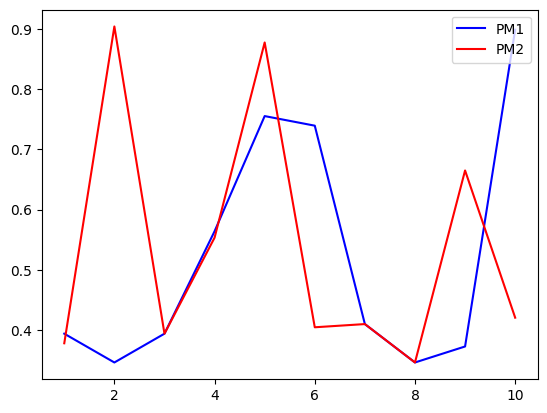

In [194]:
splits = [x for x in range(1,11)]
plt.plot(splits,accuracy_perceptron,color="blue",label="PM1")
plt.plot(splits,accuracy_perceptron_permute,color="red",label="PM2")
plt.legend(loc = "upper right")

## Perceptron on Normalized Data (PM3)

In [195]:
w_perceptron_total_nor = []

for i in range(0,10):
    x_train_perceptron = train_data_nor_p[i]
    t_train_perceptron = train_labels_nor_p[i]
    t_train_perceptron = t_train_perceptron.reshape(-1,1)

    w_perceptron = w
    totIter = 0
    converged = False
    
    while not converged and totIter < 100000:
        totIter += 1
        
        # Shuffle the training data
        perm = np.random.permutation(len(x_train_perceptron))
        x_train_perceptron = x_train_perceptron[perm]
        t_train_perceptron = t_train_perceptron[perm]
        
        # Compute predictions and identify misclassified points
        y = x_train_perceptron.dot(w_perceptron)
        misclassified = np.where(np.multiply(y, t_train_perceptron) <= 0)[0]
        
        if misclassified.size > 0:
            # Update weights using a random misclassified point
            idx = np.random.choice(misclassified)
            w_perceptron = w_perceptron + np.multiply(t_train_perceptron[idx], x_train_perceptron[idx]).reshape(-1, 1)
        else:
            # Convergence check
            converged = True
    
    print(i, totIter)
    w_perceptron_total_nor.append(w_perceptron.reshape(30))

pd.DataFrame(w_perceptron_total_nor)

0 2783
1 845
2 446
3 100000
4 556
5 3188
6 17270
7 100000
8 86267
9 16783


0          1           2           3          4           5   \
0    7.445145  18.191125    4.921655   13.285198 -15.450410   51.469388   
1   -8.821938  -7.361474  -12.006629    0.280491 -13.460708   30.736297   
2   -2.635060   0.759814   -1.017581   -5.632550 -11.695478    6.428298   
3  136.517831 -14.813696 -180.419621  158.739791 -25.573972  163.619626   
4   -1.327481   4.854381   -2.236790   -0.802589   4.900281    4.333759   
5   19.433349 -10.009665    8.306517   21.360785 -29.050498   28.699692   
6   20.851157  14.304081  -36.011732   23.533148 -17.593849   79.599602   
7   77.869046   3.876698 -230.365576   30.557590 -35.410880  162.530661   
8   62.310048 -26.234803  -78.217508  199.635309 -89.018851  164.724048   
9  -16.961283   4.547629  -76.041262   83.628539  -0.406914  119.426111   

           6           7          8          9   ...          20         21  \
0  -10.139763  -48.797333  22.076741   2.089110  ...  -42.547637 -32.269615   
1  -13.469191  -10.465610  13.001991  -7.134530  ...   -3.295257 -21.869535   
2    1.989808   -3.207822   9.468353  -5.015090  ...  -22.560640 -31.100005   
3 -134.678558  -41.724407 -12.379342   1.886841  ...  -12.784107 -69.042018   
4  -16.621046  -13.998248   0.893397   5.906513  ...  -14.003309 -20.410022   
5  -71.793261   30.339288  16.489033 -13.537229  ...  -45.114585 -16.660583   
6  -42.803020  -76.121766  39.834827  28.534142  ...    2.917199 -55.165876   
7  -76.486623    2.017786  27.474389 -67.492092  ...  124.305359 -76.163452   
8  -82.533493 -116.332664  61.755066  16.834918  ... -192.844008 -66.354979   
9  -89.131821  -21.267424   2.291759 -33.147584  ...   -4.465124 -65.030638   

           22          23         24          25         26         27  \
0  -33.629479  -12.720277  10.078643  -12.914178 -22.042130  26.115386   
1   -7.381623    5.882005   2.415510   13.296699 -26.396893 -13.224955   
2   -9.632506  -22.934656  -9.154229   10.953073 -12.129619 -24.174152   
3 -144.849593  -58.888437 -53.409777  -25.157952 -75.061826  63.538180   
4   -7.970907  -12.447299 -15.001429   17.937971  -2.608996   1.044150   
5  -39.906528   -4.320219  37.122586    7.829038 -25.039005 -16.442280   
6 -111.463166   75.078376  -6.111902   45.628315 -12.666793  39.501089   
7  -39.028714  -27.207321   0.660897   12.872097 -86.391024 -38.490345   
8 -200.498030  156.310673  30.555786  198.238938 -72.894729 -22.037944   
9  -40.584158   23.049090 -32.126041   67.548144 -77.170646  -0.863769   

           28          29  
0  -38.637585  -45.009027  
1  -26.317441  -12.367932  
2  -19.834792   14.392034  
3  -17.834925  -37.173478  
4   -0.832503  -25.174460  
5  -27.895769  -22.620544  
6  -46.718749 -160.464396  
7  -76.356311   33.148521  
8 -105.020819 -140.645720  
9  -26.728951  -15.978840  

[10 rows x 30 columns]

In [196]:
accuracy_perceptron_nor = []
precision_perceptron_nor = []
recall_perceptron_nor = []
analysis_perceptron_nor = []

for i in range(0,10):
    x_test_perceptron = test_data_nor_p[i]
    t_test_perceptron = test_labels_nor_p[i]
    t_test_perceptron = t_test_perceptron.reshape(-1,1)
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    y_pred = x_test_perceptron.dot(w_perceptron_total_nor[i])
    y_pred = y_pred.reshape(-1,1)
    for j in range(0,len(y_pred)):
        if y_pred[j] > 0:
            if t_test_perceptron[j] > 0:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if t_test_perceptron[j] <= 0:
                tn = tn + 1
            else:
                fn = fn + 1
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if(tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    recall = tp / (tp + fn)
    accuracy_perceptron_nor.append(accuracy)
    precision_perceptron_nor.append(precision)
    recall_perceptron_nor.append(recall)

analysis_perceptron_nor.append(accuracy_perceptron_nor)
analysis_perceptron_nor.append(precision_perceptron_nor)
analysis_perceptron_nor.append(recall_perceptron_nor)

pm3_accuracy = np.mean(np.asarray(accuracy_perceptron_nor))
pm3_precision = np.mean(np.asarray(precision_perceptron_nor))
pm3_recall = np.mean(np.asarray(recall_perceptron_nor))

pd.DataFrame(analysis_perceptron_nor,index=["accuracy","precision","recall"],columns=[1,2,3,4,5,6,7,8,9,10])

1         2         3         4         5         6   \
accuracy   0.930851  0.920213  0.957447  0.973404  0.968085  0.925532   
precision  0.942623  0.940678  0.972973  0.974359  0.958678  0.913386   
recall     0.950413  0.932773  0.955752  0.982759  0.991453  0.974790   

                 7         8         9         10  
accuracy   0.957447  0.957447  0.957447  0.946809  
precision  0.960000  0.967742  0.982906  0.982759  
recall     0.975610  0.967742  0.950413  0.934426

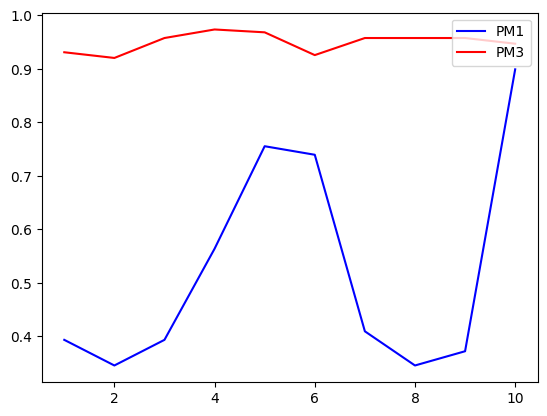

In [197]:
splits = [x for x in range(1,11)]
plt.plot(splits,accuracy_perceptron,color="blue",label="PM1")
plt.plot(splits,accuracy_perceptron_nor,color="red",label="PM3")
plt.legend(loc = "upper right")

## Perceptron on Unnormalized Data with Shuffled features (PM4)

In [198]:
w_perceptron_total_shuffle = []

for i in range(0,10):
    x_train_perceptron = train_data_p_shuffle[i]
    t_train_perceptron = train_labels_p_shuffle[i]
    t_train_perceptron = t_train_perceptron.reshape(-1,1)
    
    w_perceptron = w
    totIter = 0
    while True and totIter<maxIters:
        totIter = totIter + 1
        flag = False
        for data in range(len(x_train_perceptron)):
            it = it + 1
            datapoint = x_train_perceptron[data].reshape(-1,1)
            if(((datapoint.T).dot(w_perceptron))*t_train_perceptron[data] <= 0):
                it = 0
                w_perceptron = w_perceptron + (t_train_perceptron[data]*datapoint)
                break

        if(it == len(x_train_perceptron)):
            break
    print(i,totIter)
    w_perceptron_total_shuffle.append(w_perceptron.reshape(30))

pd.DataFrame(w_perceptron_total_shuffle)

0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100


0        1        2        3        4         5       6        7   \
0 -0.72733 -0.00052  1.81028  1143.67  1.53677 -0.392802  240.29  0.90289   
1 -1.18405  1.88368  3.34371   538.35  3.08525  2.696560  364.45  3.11369   
2 -0.95500 -0.10905 -1.14900  -475.00 -0.39550  0.033500  -21.00 -0.43750   
3  0.67411 -0.22534  1.22013  -259.87  0.56337 -4.669670  138.79  0.13737   
4  1.43082  0.55689  3.26297   533.85  2.47436  0.575680  323.83  3.69866   
5 -0.05838  1.76978  1.24407   485.27  1.76547  0.217900  219.09  2.62969   
6 -1.21266  1.12978  2.08590   756.62  2.30302  0.171540  349.64  4.19782   
7 -1.04198  0.78912  2.33934   445.94  1.49530 -0.740100  180.56  1.73430   
8 -1.78948  0.39537  2.47748   431.64  1.93053  0.311140  235.60  2.69035   
9  1.66832  0.83467  2.46518   943.63  2.54778  0.174224  260.15  3.23515   

         8       9   ...        20       21       22       23       24  \
0 -0.067378   771.9  ... -2.911630  1627.61  -77.319   6.8483 -17.8626   
1  0.280817  1501.9  ... -0.794700  2341.87  152.505  12.6413  18.9388   
2 -0.045950   745.0  ... -0.053000    -5.00    9.050  -4.2750   0.4000   
3 -0.390125 -3877.8  ... -1.235670   748.63  -53.010   6.8193  -8.1102   
4  0.105437  3747.7  ... -0.484620  1866.88   -5.754  10.4508  -0.5167   
5  0.096988  2470.3  ...  0.312060  1412.71   84.228  10.2529  10.8043   
6  0.012484  -549.0  ... -1.344826  2002.82   36.856   9.1392   7.2428   
7  0.103590  1156.0  ... -1.082420  1063.18   -2.202   9.1440   0.5020   
8  0.102575  3018.6  ... -1.361950  1161.40   19.663   7.3134   4.5925   
9  0.108827  3110.1  ... -0.526778  1600.62   29.056   6.5557   3.8213   

        25        26      27        28       29  
0  2.71440 -2.829160  1.9353 -5.074010 -2456.68  
1  3.40938  1.964300  8.5488  0.742940   668.98  
2 -0.39500 -3.340000 -1.8400  0.258500    23.50  
3  0.47990  0.332130  3.3999 -4.648750 -1131.39  
4  4.58830  3.482100  7.1365 -0.715490  -729.30  
5  2.94708 -7.657470  7.2046 -0.332180   513.09  
6  5.81508 -4.362400  5.8614 -2.668800   231.78  
7  3.26700 -7.911000  3.7258 -2.314600  -330.98  
8  3.41180 -5.445900  6.1542 -2.461170  -226.04  
9  3.66952 -6.617468  5.5294 -3.107464  -245.47  

[10 rows x 30 columns]

In [199]:
accuracy_perceptron_shuffle = []
precision_perceptron_shuffle = []
recall_perceptron_shuffle = []
analysis_perceptron_shuffle = []

for i in range(0,10):
    x_test_perceptron = test_data_p_shuffle[i]
    t_test_perceptron = test_labels_p_shuffle[i]
    t_test_perceptron = t_test_perceptron.reshape(-1,1)
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    y_pred = x_test_perceptron.dot(w_perceptron_total_shuffle[i])
    y_pred = y_pred.reshape(-1,1)
    
    for j in range(0,len(y_pred)):
        if y_pred[j] > 0:
            if t_test_perceptron[j] > 0:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if t_test_perceptron[j] <= 0:
                tn = tn + 1
            else:
                fn = fn + 1
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if(tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    recall = tp / (tp + fn)
    accuracy_perceptron_shuffle.append(accuracy)
    precision_perceptron_shuffle.append(precision)
    recall_perceptron_shuffle.append(recall)

analysis_perceptron_shuffle.append(accuracy_perceptron_shuffle)
analysis_perceptron_shuffle.append(precision_perceptron_shuffle)
analysis_perceptron_shuffle.append(recall_perceptron_shuffle)

pm4_accuracy = np.mean(np.asarray(accuracy_perceptron_shuffle))
pm4_precision = np.mean(np.asarray(precision_perceptron_shuffle))
pm4_recall = np.mean(np.asarray(recall_perceptron_shuffle))

pd.DataFrame(analysis_perceptron_shuffle,index=["accuracy","precision","recall"],columns=[1,2,3,4,5,6,7,8,9,10])

1         2         3         4         5         6   \
accuracy   0.393617  0.345745  0.393617  0.563830  0.755319  0.739362   
precision  1.000000  0.000000  0.000000  0.586592  0.726708  0.695652   
recall     0.025641  0.000000  0.000000  0.929204  0.983193  1.000000   

                 7         8        9         10  
accuracy   0.409574  0.345745  0.37234  0.898936  
precision  0.000000  0.000000  0.00000  0.877049  
recall     0.000000  0.000000  0.00000  0.963964

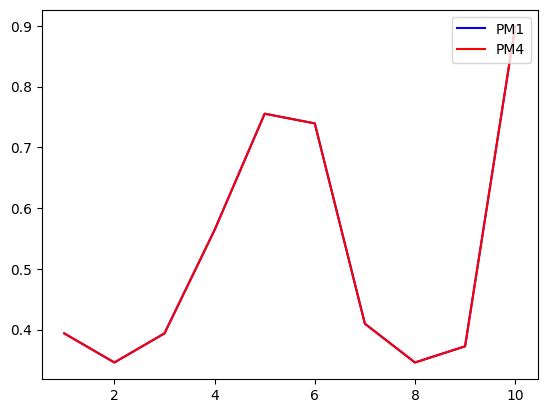

In [200]:
splits = [x for x in range(1,11)]
plt.plot(splits,accuracy_perceptron,color="blue",label="PM1")
plt.plot(splits,accuracy_perceptron_shuffle,color="red",label="PM4")
plt.legend(loc = "upper right")

# PART B - Fisher's Discriminant Analysis

## Learning Task 1 (FLDM1)

In [201]:
def get_Sw(x_train,t_train):
    X_m_indices = np.where(t_train[:,0] == 0)
    X_b_indices = np.where(t_train[:,0] == 1)
    X_m = x_train[X_m_indices]
    X_b = x_train[X_b_indices]

    mean_m = np.mean(X_m,axis=0)
    mean_b = np.mean(X_b,axis=0)
    
    centered_data_m = X_m - mean_m
    centered_data_b = X_b - mean_b
    
    covariance_matrix_m = np.dot(centered_data_m.T, centered_data_m) / len(centered_data_m)
    covariance_matrix_b = np.dot(centered_data_b.T, centered_data_b) / len(centered_data_b)
    covariance_matrix = covariance_matrix_m + covariance_matrix_b
    
    return covariance_matrix,mean_m,mean_b

In [202]:
def get_params(x_red_np1,t_train1):
    mean_m_indices = np.where(t_train1[:,0] == 0)
    mean_b_indices = np.where(t_train1[:,0] == 1)
    projected_mean_m = np.mean(x_red_np1[mean_m_indices])
    projected_mean_b = np.mean(x_red_np1[mean_b_indices])
    
    projected_std_m = np.std(x_red_np1[mean_m_indices])
    projected_std_b = np.std(x_red_np1[mean_b_indices])
    
    return projected_mean_m,projected_mean_b,projected_std_m,projected_std_b

In [203]:
def get_intersection(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

In [204]:
def get_accuracy(X_test,y_test,w,threshold_point1):
    
    predicted_val = np.dot(X_test,w)
    y_pred = np.where(predicted_val >= threshold_point1, 0, 1).reshape(-1,1)
    
    y_true = y_test.reshape(-1,1)
    
    tn = np.sum((y_true[:,0] == 0) & (y_pred[:,0] == 0))
    fn = np.sum((y_true[:,0] == 1) & (y_pred[:,0] == 0))
    tp = np.sum((y_true[:,0] == 1) & (y_pred[:,0] == 1))
    fp = np.sum((y_true[:,0] == 0) & (y_pred[:,0] == 1))
    
    if(tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + fp + tn + fn)

    return precision,recall,accuracy


C:\Users\mufad\AppData\Local\Temp\ipykernel_185848\3014897689.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_red_np, np.zeros(len(x_red_np)), c=colors, cmap='rainbow')


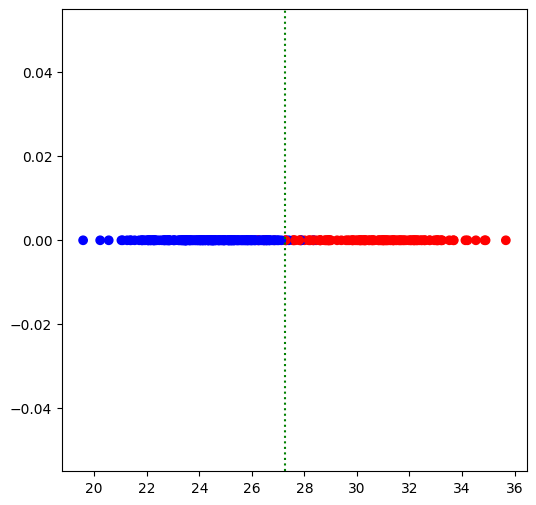

Threshold point:  27.27138388278388
Precision:0.975, Recall:1.0, Accuracy:0.9840425531914894


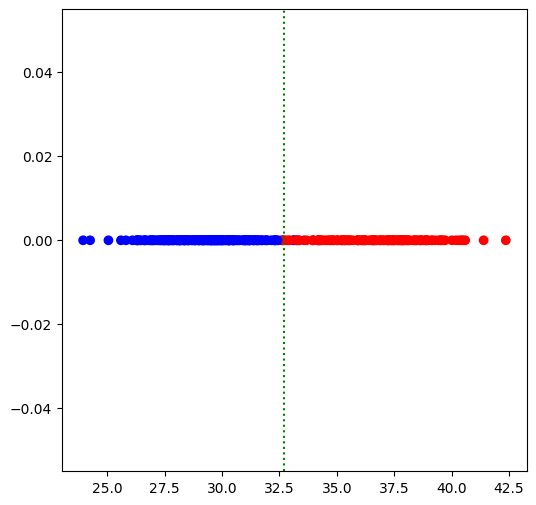

Threshold point:  32.70382025433839
Precision:0.9596774193548387, Recall:0.9754098360655737, Accuracy:0.9574468085106383


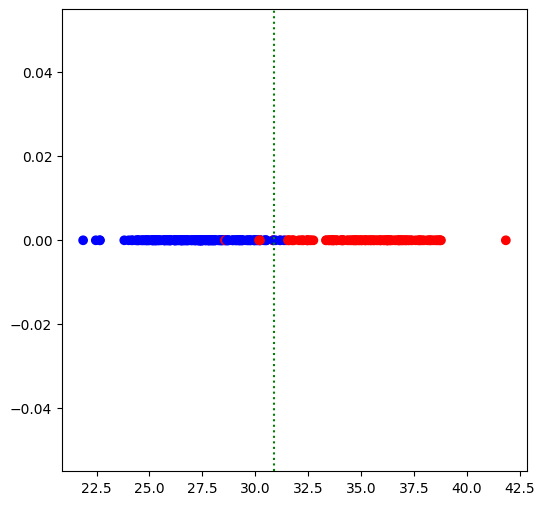

Threshold point:  30.87031048382762
Precision:0.954954954954955, Recall:0.954954954954955, Accuracy:0.9468085106382979


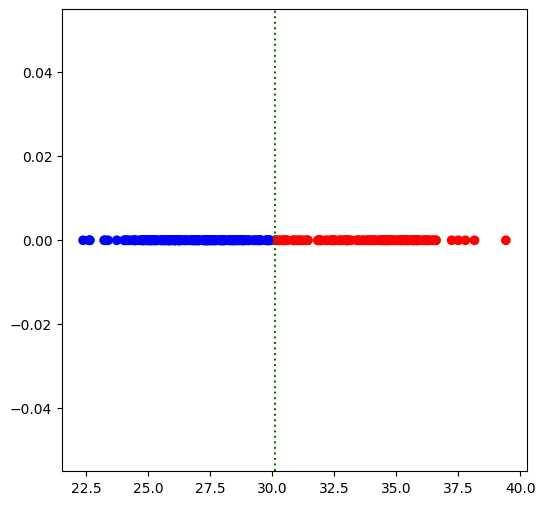

Threshold point:  30.0916559016003
Precision:0.9912280701754386, Recall:0.9658119658119658, Accuracy:0.973404255319149


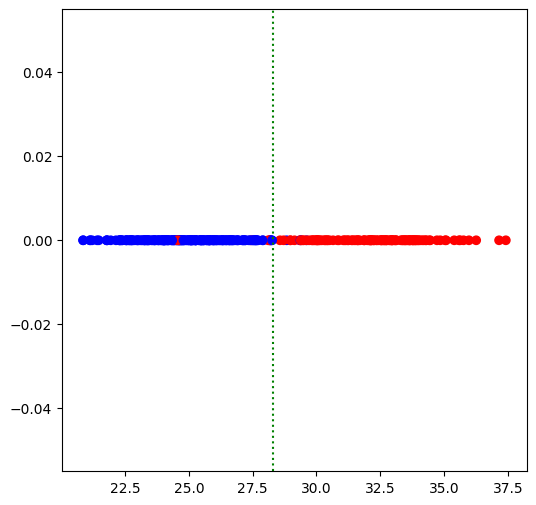

Threshold point:  28.308188917399153
Precision:0.9741379310344828, Recall:0.9912280701754386, Accuracy:0.9787234042553191


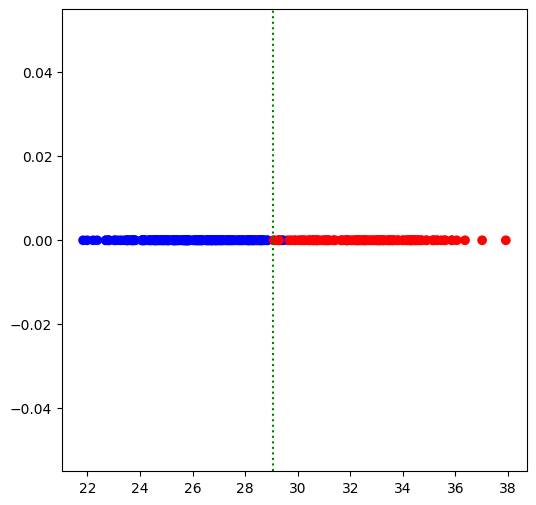

Threshold point:  29.040581717193284
Precision:0.9682539682539683, Recall:0.9838709677419355, Accuracy:0.9680851063829787


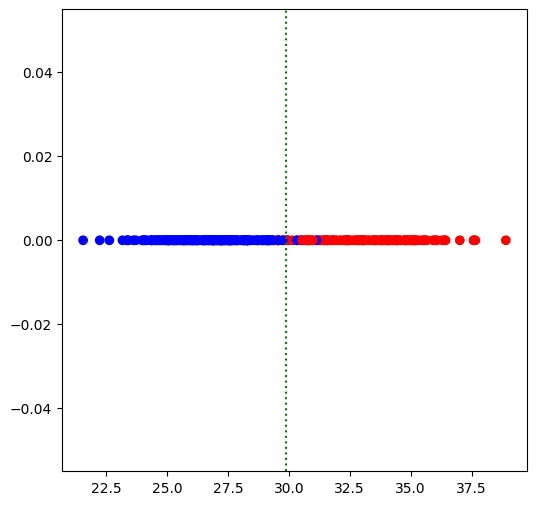

Threshold point:  29.890963917236682
Precision:0.9829059829059829, Recall:0.9745762711864406, Accuracy:0.973404255319149


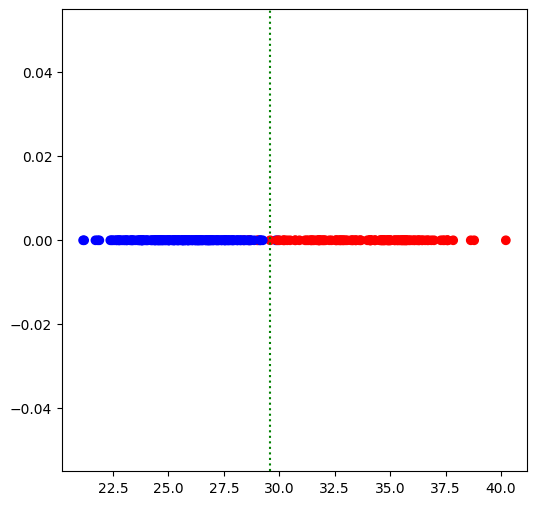

Threshold point:  29.563344761482206
Precision:0.9435483870967742, Recall:0.9831932773109243, Accuracy:0.9521276595744681


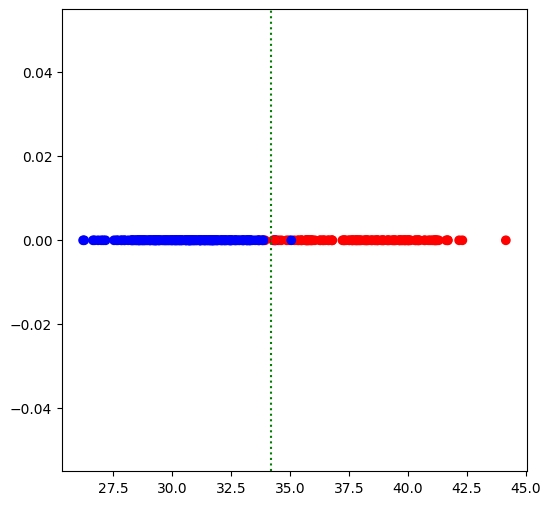

Threshold point:  34.19105905952766
Precision:0.956140350877193, Recall:0.9732142857142857, Accuracy:0.9574468085106383


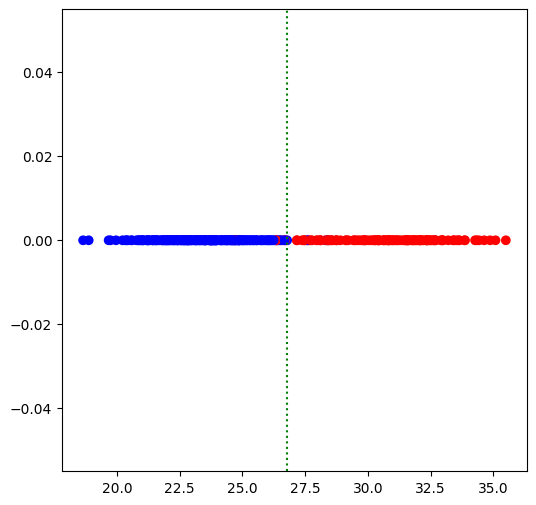

Threshold point:  26.793319526380788
Precision:0.9826086956521739, Recall:0.9741379310344828, Accuracy:0.973404255319149


In [205]:
fldm1_accuracy = 0
fldm1_precision = 0
fldm1_recall = 0

for i in range(0,10):
    x_train_np = train_data[i]
    t_train_np = train_labels[i].reshape(-1,1)
    x_test_np = test_data[i]
    t_test_np = test_labels[i].reshape(-1,1)

    cov_matrix, mean_m, mean_b = get_Sw(x_train_np,t_train_np)
    inv_cov_matrix = np.linalg.inv(np.asarray(cov_matrix, dtype=np.float64))

    w = inv_cov_matrix.dot((mean_m - mean_b)).reshape(-1,1)
    x_red_np = x_train_np.dot(w)

    color_map = {0: 'red', 1: 'blue'}
    colors = np.vectorize(lambda x: color_map[x])(t_train_np.flatten())

    # Create scatter plot

    plt.figure(figsize=(6,6))
    plt.scatter(x_red_np, np.zeros(len(x_red_np)), c=colors, cmap='rainbow')
    

    projected_mean_m, projected_mean_b, projected_std_m, projected_std_b = get_params(x_red_np,t_train_np)
    threshold_point = get_intersection(projected_mean_m,projected_mean_b,projected_std_m,projected_std_b)
    if threshold_point[1]> threshold_point[0]:
        threshold_point[0]=threshold_point[1]
    threshold_point = threshold_point[0]

    plt.axvline(x=threshold_point, color='green', linestyle='dotted')
    plt.show()

    print("Threshold point: ",threshold_point)

    precision, recall, accuracy = get_accuracy(x_test_np,t_test_np,w,threshold_point)
    fldm1_accuracy = fldm1_accuracy + accuracy
    fldm1_precision = fldm1_precision + precision
    fldm1_recall = fldm1_recall + recall

    print(f"Precision:{precision}, Recall:{recall}, Accuracy:{accuracy}")

fldm1_accuracy = fldm1_accuracy/10
fldm1_precision = fldm1_precision/10
fldm1_recall = fldm1_recall/10

## Learning Task 2 (FLDM2)

C:\Users\mufad\AppData\Local\Temp\ipykernel_185848\2751863034.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_red_np, np.zeros(len(x_red_np)), c=colors, cmap='rainbow')


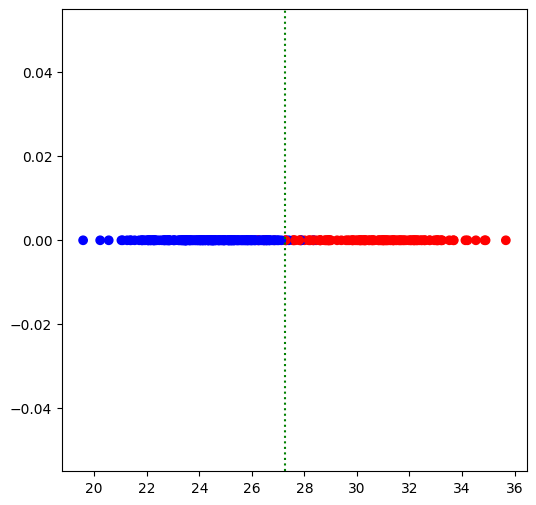

Threshold point:  27.271383882782267
Precision:0.975, Recall:1.0, Accuracy:0.9840425531914894


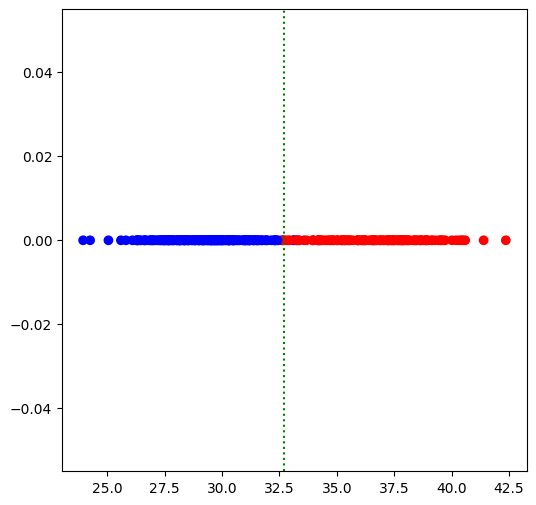

Threshold point:  32.703820254347264
Precision:0.9596774193548387, Recall:0.9754098360655737, Accuracy:0.9574468085106383


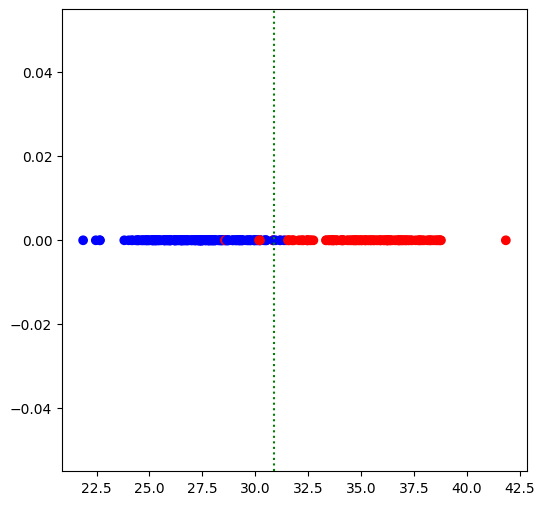

Threshold point:  30.870310483825023
Precision:0.954954954954955, Recall:0.954954954954955, Accuracy:0.9468085106382979


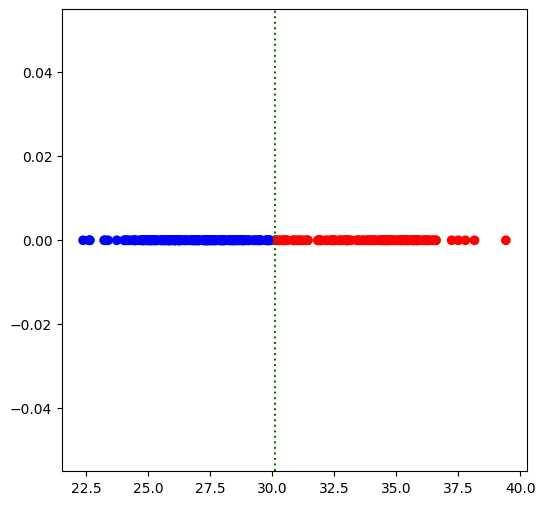

Threshold point:  30.09165590156018
Precision:0.9912280701754386, Recall:0.9658119658119658, Accuracy:0.973404255319149


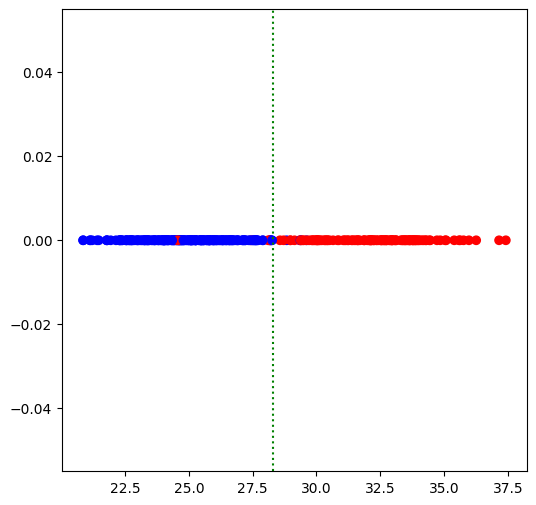

Threshold point:  28.308188917394332
Precision:0.9741379310344828, Recall:0.9912280701754386, Accuracy:0.9787234042553191


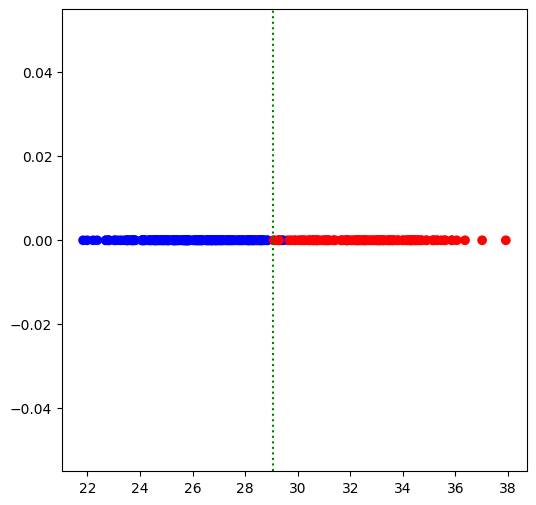

Threshold point:  29.040581717188072
Precision:0.9682539682539683, Recall:0.9838709677419355, Accuracy:0.9680851063829787


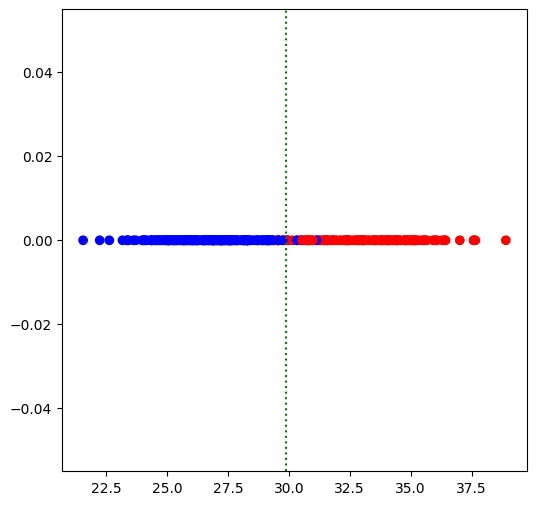

Threshold point:  29.890963917231193
Precision:0.9829059829059829, Recall:0.9745762711864406, Accuracy:0.973404255319149


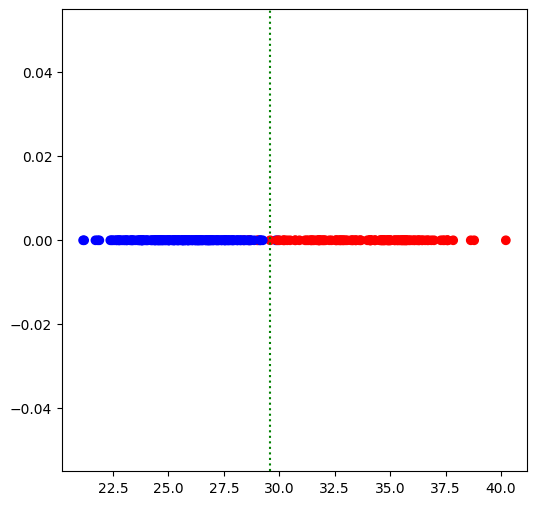

Threshold point:  29.56334476149908
Precision:0.9435483870967742, Recall:0.9831932773109243, Accuracy:0.9521276595744681


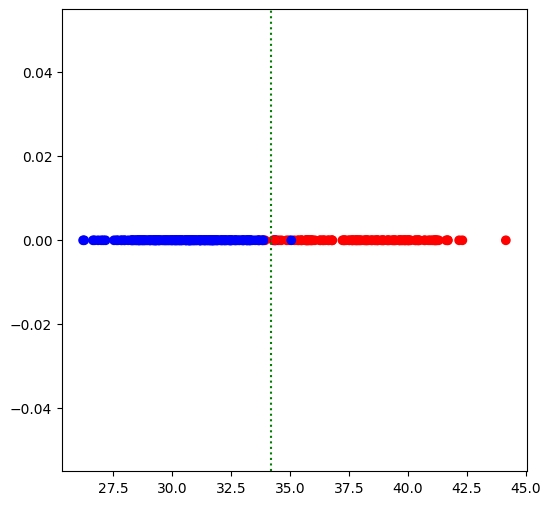

Threshold point:  34.19105905951048
Precision:0.956140350877193, Recall:0.9732142857142857, Accuracy:0.9574468085106383


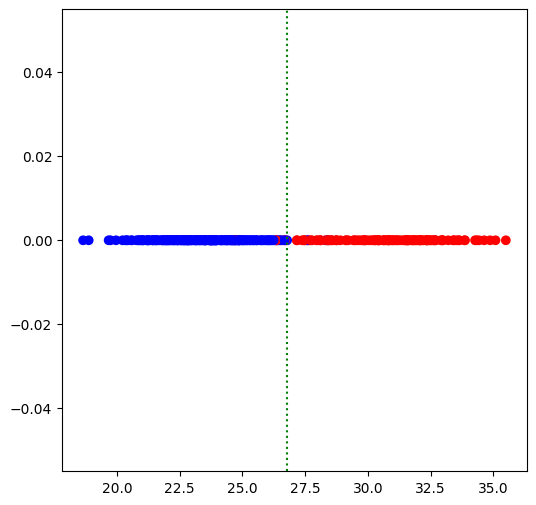

Threshold point:  26.793319526459236
Precision:0.9826086956521739, Recall:0.9741379310344828, Accuracy:0.973404255319149
0.9664893617021276 0.9688455760305807 0.9776397559996001


In [235]:
fldm2_accuracy = 0
fldm2_precision = 0
fldm2_recall = 0

for i in range(0,10):
    x_train_np = train_data_shuffle[i]
    t_train_np = train_labels_shuffle[i].reshape(-1,1)
    x_test_np = test_data_shuffle[i]
    t_test_np = test_labels_shuffle[i].reshape(-1,1)

    cov_matrix, mean_m, mean_b = get_Sw(x_train_np,t_train_np)
    inv_cov_matrix = np.linalg.inv(np.asarray(cov_matrix, dtype=np.float64))

    w = inv_cov_matrix.dot((mean_m - mean_b)).reshape(-1,1)
    x_red_np = x_train_np.dot(w)

    color_map = {0: 'red', 1: 'blue'}
    colors = np.vectorize(lambda x: color_map[x])(t_train_np.flatten())

    # Create scatter plot

    plt.figure(figsize=(6,6))
    plt.scatter(x_red_np, np.zeros(len(x_red_np)), c=colors, cmap='rainbow')

    projected_mean_m, projected_mean_b, projected_std_m, projected_std_b = get_params(x_red_np,t_train_np)
    threshold_point = get_intersection(projected_mean_m,projected_mean_b,projected_std_m,projected_std_b)
    if threshold_point[1]> threshold_point[0]:
        threshold_point[0]=threshold_point[1]
    threshold_point = threshold_point[0]

    plt.axvline(x=threshold_point, color='green', linestyle='dotted')
    plt.show()
    print("Threshold point: ",threshold_point)

    precision, recall, accuracy = get_accuracy(x_test_np,t_test_np,w,threshold_point)
    fldm2_accuracy = fldm2_accuracy + accuracy
    fldm2_precision = fldm2_precision + precision
    fldm2_recall = fldm2_recall + recall

    print(f"Precision:{precision}, Recall:{recall}, Accuracy:{accuracy}")


fldm2_accuracy = fldm2_accuracy/10
fldm2_precision = fldm2_precision/10
fldm2_recall = fldm2_recall/10
print(fldm2_accuracy,fldm2_precision,fldm2_recall)

<h1>Logistic Regression on Unnormalized Data (LR1)</h1>

In [207]:
w = np.zeros((30,1), dtype=float)
w.shape

(30, 1)

In [208]:
def target(w1, train_data1, iter1):
    product = np.asarray((train_data1.dot(w1)) * -1, dtype=np.float64)
    product = product.reshape(-1,1)
    for k in range(len(product)):
        if(product[k] > 709):
            product[k] = 709
    y_n = 1 / (1 + np.exp(product))
    return y_n

<h3> Vector Gradient Descent </h3>

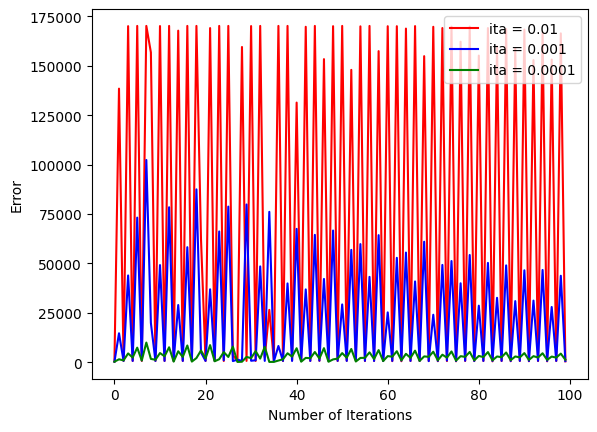

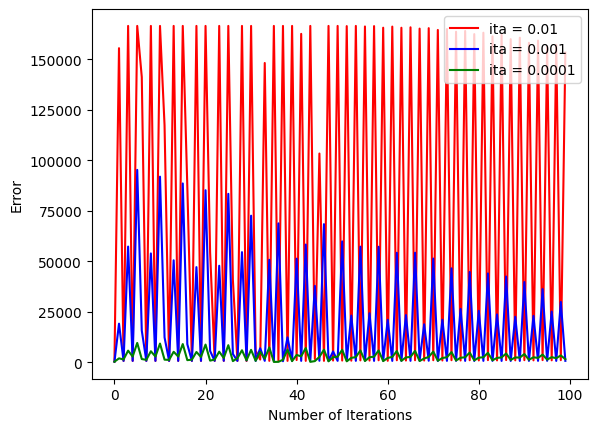

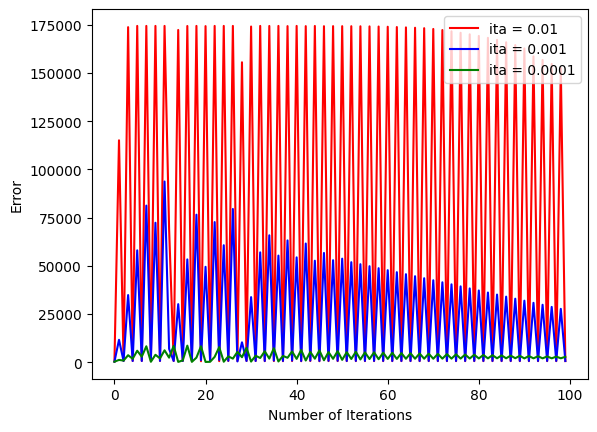

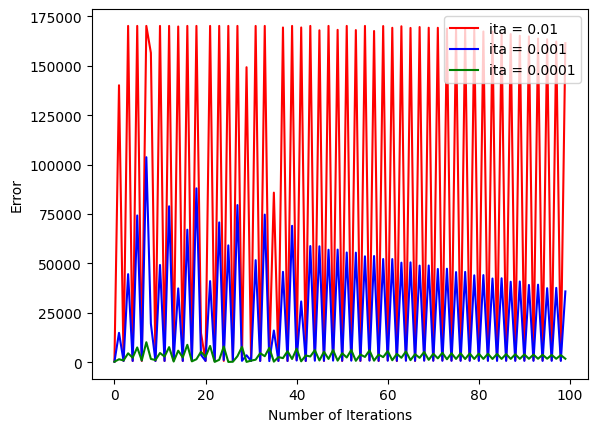

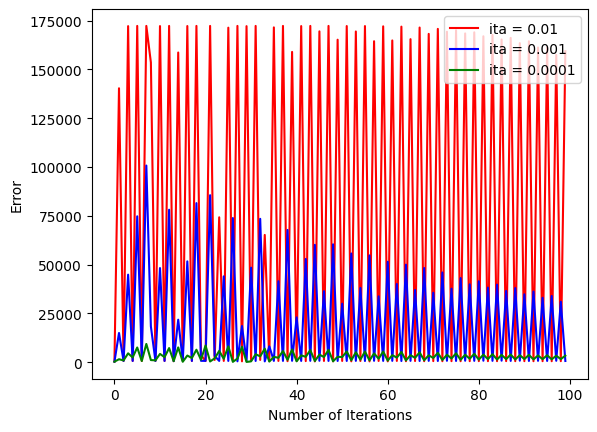

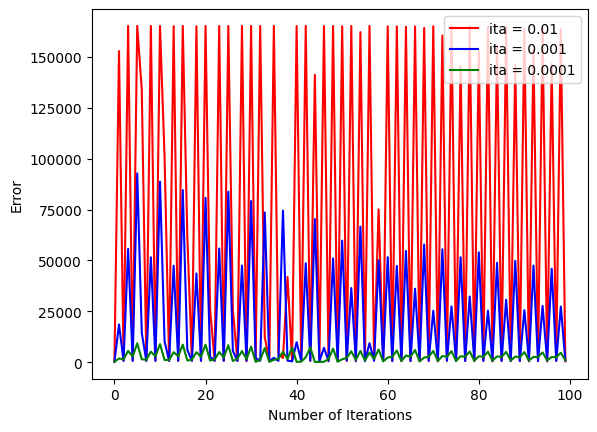

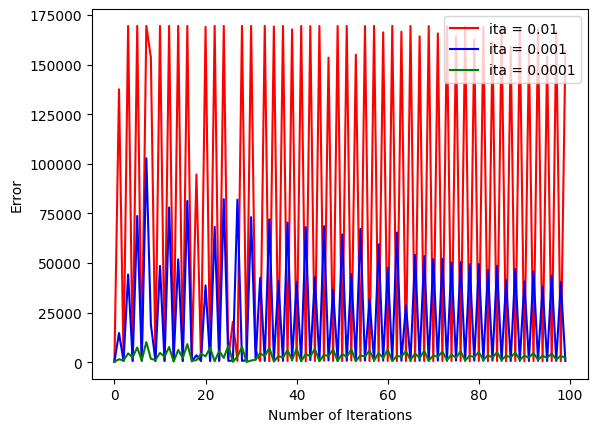

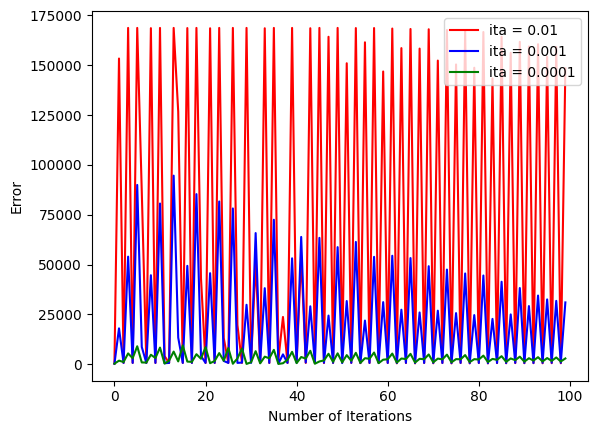

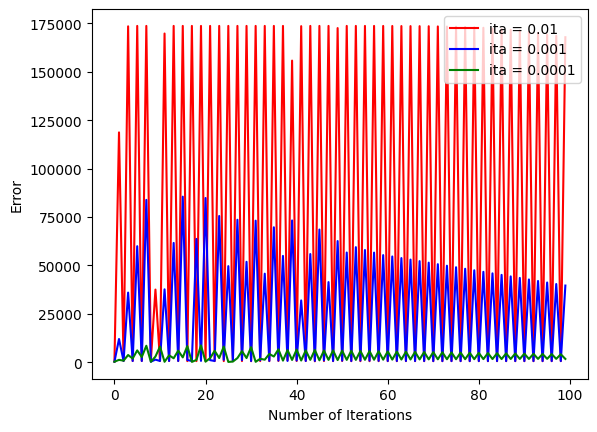

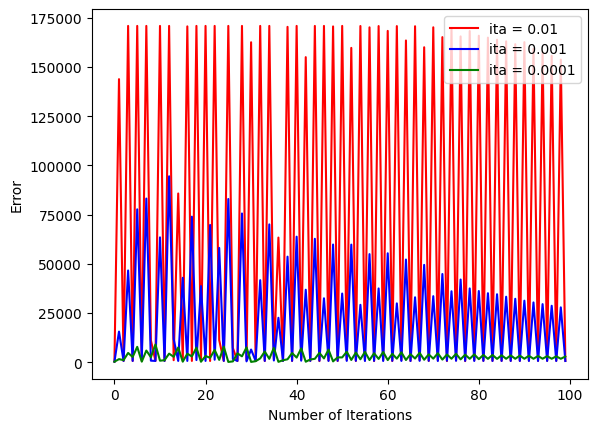

In [209]:
iters = 100
N = x_train_np[:,0].size
itas = [0.01,0.001,0.0001]
w_train_total = []
plot_data_total = []


for i in range(0,10):
    x_train_np = train_data[i]
    t_train_np = train_labels[i]
    
    w_train = []
    plot_data_itas = []

    for ita in itas:
        w_req = w
        plot_data = []

        for iter in range(iters):
            y_n = target(w_req,x_train_np, iter)
            t_train_np = t_train_np.reshape(-1,1)
            yMinusT = (y_n - t_train_np)
            error_der = (x_train_np.T).dot(yMinusT)
            w_req = w_req - ((1/N) * ita * error_der)
            for data in range(len(x_train_np)):
                if y_n[data] == 1:
                    y_n[data] = 0.99
            error1 = (((t_train_np.T).dot(np.log(y_n))) + (((1-t_train_np).T).dot(np.log(1-(y_n)))))
            error1.reshape(-1,1)
            error = -error1[0]

            plot_data.append(error)
        
        w_train.append(w_req)
        plot_data_itas.append(plot_data)
    w_train_total.append(w_train)
    plot_data_total.append(plot_data_itas)

for i in range(0,10):
    iterations = [x for x in range(0,iters)]
    fig,ax = plt.subplots()
    ax.plot(iterations,plot_data_total[i][0], color="red", label="ita = 0.01")
    ax.plot(iterations,plot_data_total[i][1], color="blue", label="ita = 0.001")
    ax.plot(iterations,plot_data_total[i][2], color="green", label="ita = 0.0001")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    ax.legend(loc = "upper right")
    plt.show()
    

In [210]:
np.abs(np.sum(w_train[2]))

0.26615599572839305

In [211]:
def calculateValue(w_trained, test_input):
    value = np.asarray(test_input.dot(w_trained) * -1, dtype=np.float64)
    if value>709:
        value = 709
    return (1/(1 + np.exp(value)))


In [212]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
correct_preds_total = []
wrong_preds_total = []
y_preds_total = []

for i in range(0,10):
    x_test_np = test_data[i]
    t_test_np = test_labels[i]
    correct_preds = []
    wrong_preds = []
    y_preds = []


    for thresh in range(len(thresholds)):

        for k in range(0,3):
            correct_pred = []
            wrong_pred = []
            y_pred = []
            w_test_req = np.asarray(w_train_total[i][k])

            for j in range(0,t_test_np.size):
                x_test_input = x_test_np[j,:]
                y_test = calculateValue(w_test_req,x_test_input)
                if y_test >= thresholds[thresh]:
                    roundedValue = 1
                else:
                    roundedValue = 0
                
                y_pred.append(roundedValue)
                if roundedValue - t_test_np[j] == 0:
                    correct_pred.append(j)
                else:
                    wrong_pred.append(j)
            
            y_preds.append(y_pred)
            correct_preds.append(correct_pred)
            wrong_preds.append(wrong_pred)
    
    y_preds_total.append(y_preds)
    correct_preds_total.append(correct_preds)
    wrong_preds_total.append(wrong_preds)

y_preds_total_dataframe = []
for i in range(0,10):
    y_preds_total_dataframe.append(pd.DataFrame(y_preds_total[i]))
    y_preds_total_dataframe[i].insert(0, 'Threshold', ['0.5', '0.5','0.5','0.3','0.3','0.3','0.4','0.4','0.4','0.6','0.6',
                                  '0.6','0.7','0.7','0.7'])
    y_preds_total_dataframe[i].insert(1, 'ita', ['0.01', '0.001','0.0001','0.01','0.001','0.0001','0.01','0.001','0.0001','0.01','0.001',
                                  '0.0001','0.01','0.001','0.0001'])


for i in range(0,10):
    print(y_preds_total_dataframe[i])

   Threshold     ita  0  1  2  3  4  5  6  7  ...  178  179  180  181  182  \
0        0.5    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
1        0.5   0.001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
2        0.5  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
3        0.3    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
4        0.3   0.001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
5        0.3  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
6        0.4    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
7        0.4   0.001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
8        0.4  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
9        0.6    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
10       0.6   0.001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
11       0.6  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0

Accuracy, Precision and Recall 

In [213]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
itas = [0.01,0.001,0.0001]
correct_preds_total = []
wrong_preds_total = []
y_preds_total = []
lr1_accuracy = 0
lr1_precision = 0
lr1_recall = 0

for i in range(0,10):
    x_test_np = test_data[i]
    t_test_np = test_labels[i]
    correct_preds = []
    wrong_preds = []
    y_preds = []

    for thresh in range(len(thresholds)):   
        correct_pred = []
        wrong_pred = []
        y_pred = []
        
        for k in range(0,3):
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            w_test_req = np.asarray(w_train_total[i][k])

            for j in range(0,t_test_np.size):
                x_test_input = x_test_np[j,:]
                y_test = calculateValue(w_test_req,x_test_input)

                if y_test >= thresholds[thresh]:
                    y_pred = 1
                else:
                    y_pred = 0

                if y_pred == t_test_np[j]:
                    if y_pred == 1:
                        tp += 1
                    else:
                        tn += 1
                else:
                    if y_pred == 1:
                        fp += 1
                    else:
                        fn += 1
            
            y_preds.append(y_pred)
            correct_preds.append(tp)
            correct_preds.append(tn)
            wrong_preds.append(fp)
            wrong_preds.append(fn)

    y_preds_total.append(y_preds)
    correct_preds_total.append(correct_preds)
    wrong_preds_total.append(wrong_preds)
    

print(pd.DataFrame(correct_preds_total))
print(pd.DataFrame(wrong_preds_total))



for i in range(10):
    counter = 0
    Accuracy_table = []
    Precision_table = []
    Recall_table = []
    for thresh in range(0,5):
        for k in range(0,3):
            tp_total = correct_preds_total[i][counter]
            tn_total = correct_preds_total[i][counter + 1]
            fp_total = wrong_preds_total[i][counter]
            fn_total = wrong_preds_total[i][counter + 1]
            counter = counter + 2
            
            accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total)
            if(tp_total + fp_total) != 0:
                precision = tp_total / (tp_total + fp_total)
            else:
                precision = 0
            recall = tp_total / (tp_total + fn_total)
            
            Accuracy_table.append(accuracy * 100)
            Precision_table.append(precision * 100)
            Recall_table.append(recall * 100)
       
    
    print("Split:")
    print(i + 1)
    print()
    df1 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Accuracy": Accuracy_table
    })
    print("---ACCURACY---")
    pivot_Accuracy = df1.pivot_table(values="Accuracy", index="ita", columns="Threshold")
    print(pivot_Accuracy)
    print()
    
    df2 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Recall": Recall_table
    })
    print("---RECALL---")
    pivot_Recall = df2.pivot_table(values="Recall", index="ita", columns="Threshold")
    print(pivot_Recall)
    print()
    
    df3 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Precision": Precision_table
    })
    print("---PRECISION---")
    pivot_Precision = df3.pivot_table(values="Precision", index="ita", columns="Threshold")
    print(pivot_Precision)
    print()

lr1_accuracy = lr1_accuracy + 81.382979
lr1_precision = lr1_precision + 78.343949
lr1_recall = lr1_recall + 99.193548

    0   1    2   3    4   5    6   7    8   9   ...   20  21   22  23   24  \
0    2  71    2  71    2  71    2  71    2  71  ...    2  71    1  71    2   
1  122   8    1  66    1  66  122   8    1  66  ...    1  66    1  66  122   
2    3  77    3  77  110  11    3  77    3  77  ...    3  77  110  11    3   
3  117  17  117  16    0  71  117  17  117  16  ...  117  16    0  71  117   
4  113  19    0  74  113  18  113  19    0  74  ...    0  74  113  19  113   
5    3  64    0  64    3  64    3  64    0  64  ...    0  64    1  64    3   
6  118  14    0  70    0  70  118  14    0  70  ...    0  70    0  70  118   
7  118  11  118  14  118  13  118  11  118  14  ...  118  14  118  13  118   
8  111  18  111  18    0  76  111  18  111  18  ...  111  18    0  76  111   
9    2  72    2  72  116  11    2  72    2  72  ...    2  72  116  11    2   

   25   26  27   28  29  
0  71    1  71    1  71  
1   8    1  66    1  66  
2  77    3  77  110  11  
3  17  117  16    0  71  
4  19    0 

In [214]:
random_int = random.randint(0,x_train_np[:,0].size-1)
x_train_req = x_train_np[random_int:(random_int+50),:]

<h3>Batch Gradient Descent</h3>
(Unnormalized Data)

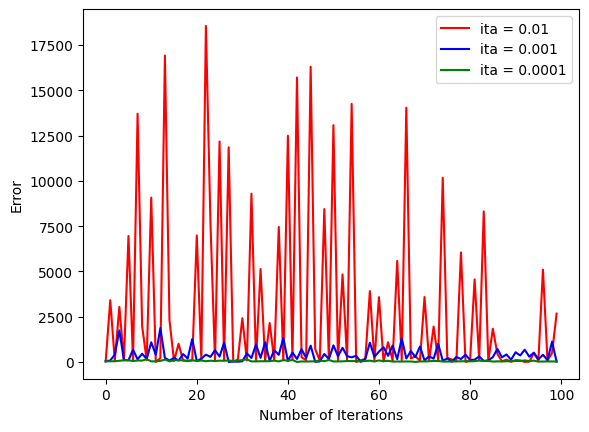

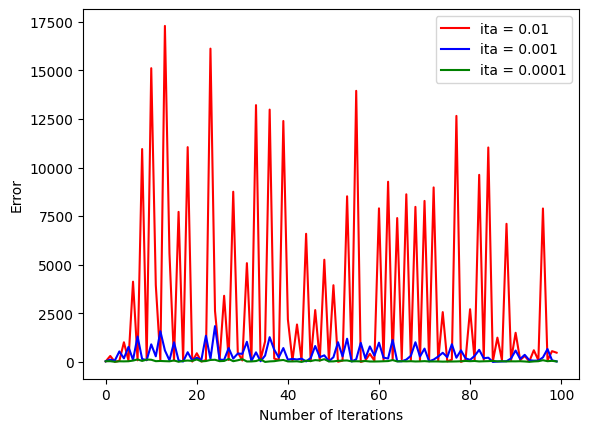

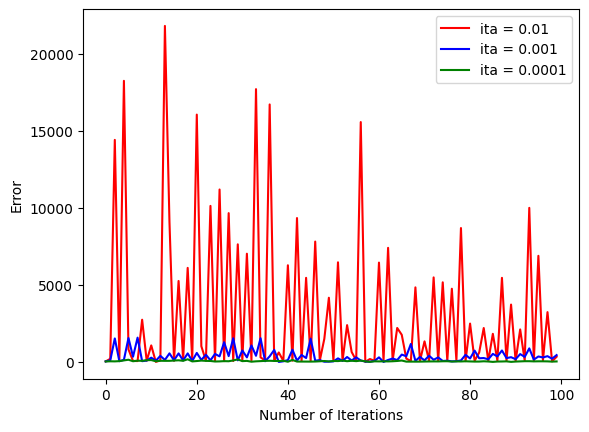

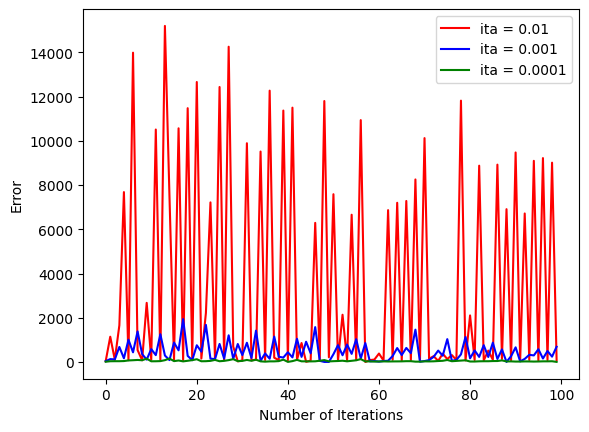

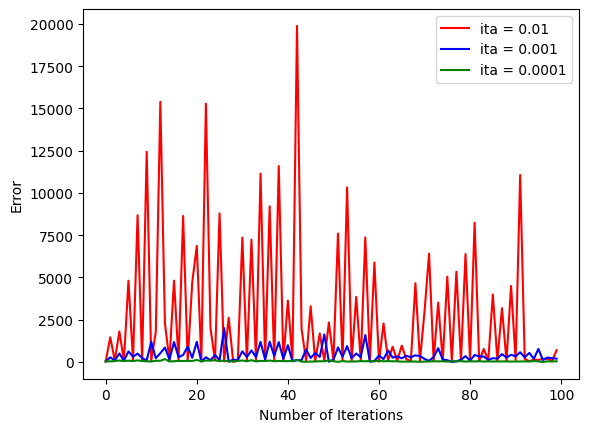

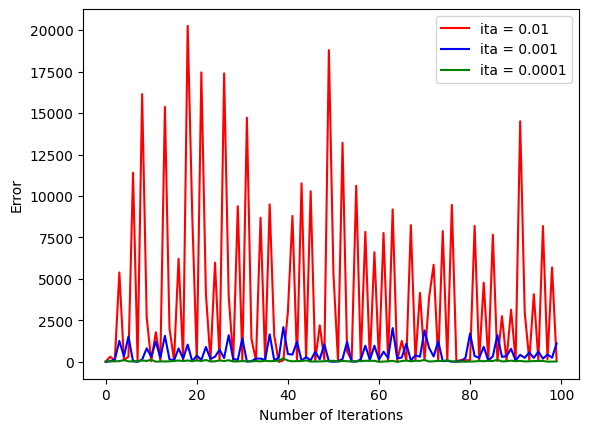

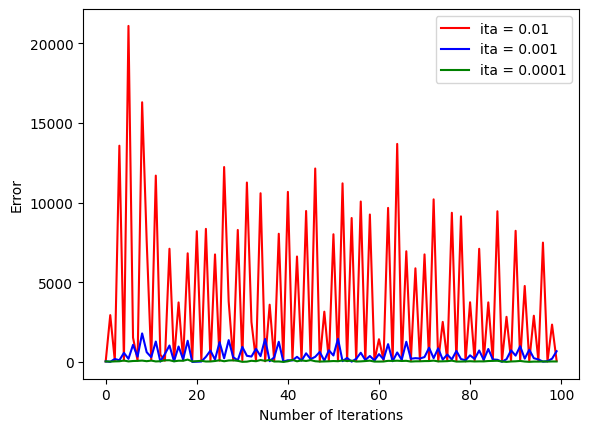

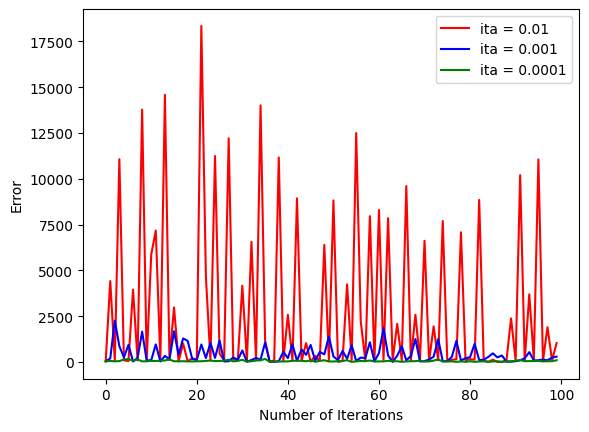

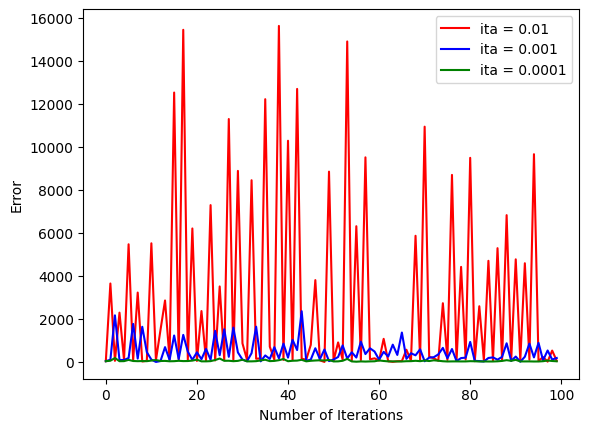

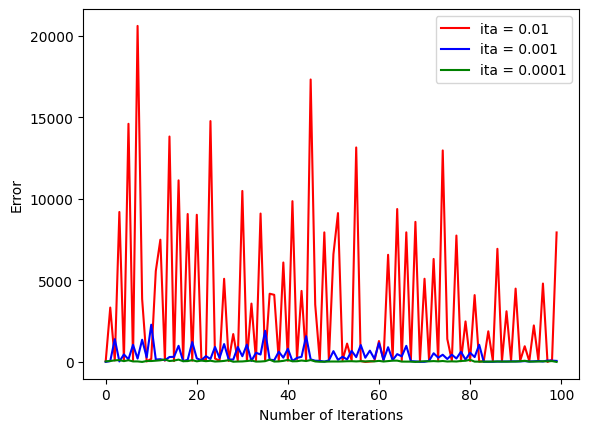

In [215]:
iters = 100
itas = [0.01,0.001,0.0001]
w_train_total_batch = []
plot_data_total_batch = []


for i in range(0,10):
    x_train_np = train_data[i]
    t_train_np = train_labels[i]
    N = x_train_np[:,0].size
    
    w_train_batch = []
    plot_data_itas_batch = []

    for ita in itas:
        w_req = w
        plot_data_batch = []

        for iter in range(iters):
            random_int = random.randint(0,x_train_np[:,0].size-1)
            x_train_req = x_train_np[random_int:(random_int+50),:]
            y_req = target(w_req,x_train_req, iter)
            t_train_np = t_train_np.reshape(-1,1)
            t_train_req = t_train_np[random_int:(random_int+50),:]
            t_train_req = t_train_req.reshape(-1,1)
            yMinusT = (y_req - t_train_req)
            error_der = (x_train_req.T).dot(yMinusT)
            w_req = w_req - ((1/N) * ita * error_der)
            for data in range(len(x_train_req)):
                if y_req[data] == 1:
                    y_req[data] = 0.99
            error1 = (((t_train_req.T).dot(np.log(y_req))) + (((1-t_train_req).T).dot(np.log(1-(y_req)))))
            error1.reshape(-1,1)
            error = -error1[0]

            plot_data_batch.append(error)
        
        w_train_batch.append(w_req)
        plot_data_itas_batch.append(plot_data_batch)
    w_train_total_batch.append(w_train_batch)
    plot_data_total_batch.append(plot_data_itas_batch)

for i in range(0,10):
    iterations = [x for x in range(0,iters)]
    fig,ax = plt.subplots()
    ax.plot(iterations,plot_data_total_batch[i][0], color="red", label="ita = 0.01")
    ax.plot(iterations,plot_data_total_batch[i][1], color="blue", label="ita = 0.001")
    ax.plot(iterations,plot_data_total_batch[i][2], color="green", label="ita = 0.0001")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    ax.legend(loc = "upper right")
    plt.show()

In [216]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
correct_preds_total_batch = []
wrong_preds_total_batch = []
y_preds_total_batch = []

for i in range(0,10):
    x_test_np = test_data[i]
    t_test_np = test_labels[i]
    correct_preds_batch = []
    wrong_preds_batch = []
    y_preds_batch = []

    for thresh in range(len(thresholds)):

        for k in range(0,3):
            correct_pred_batch = []
            wrong_pred_batch = []
            y_pred_batch = []
            w_test_req = np.asarray(w_train_total_batch[i][k])

            for j in range(0,t_test_np.size):
                x_test_input = x_test_np[j,:]
                y_test = calculateValue(w_test_req,x_test_input)
                if y_test >= thresholds[thresh]:
                    roundedValue = 1
                else:
                    roundedValue = 0
                
                y_pred_batch.append(roundedValue)
                if roundedValue - t_test_np[j] == 0:
                    correct_pred_batch.append(j)
                else:
                    wrong_pred_batch.append(j)
            
            y_preds_batch.append(y_pred_batch)
            correct_preds_batch.append(correct_pred_batch)
            wrong_preds_batch.append(wrong_pred_batch)
            
    y_preds_total_batch.append(y_preds_batch)
    correct_preds_total_batch.append(correct_preds_batch)
    wrong_preds_total_batch.append(wrong_preds_batch)

y_preds_total_dataframe = []
for i in range(0,10):
    y_preds_total_dataframe.append(pd.DataFrame(y_preds_total_batch[i]))
    y_preds_total_dataframe[i].insert(0, 'Threshold', ['0.5', '0.5','0.5','0.3','0.3','0.3','0.4','0.4','0.4','0.6','0.6',
                                  '0.6','0.7','0.7','0.7'])
    y_preds_total_dataframe[i].insert(1, 'ita', ['0.01', '0.001','0.0001','0.01','0.001','0.0001','0.01','0.001','0.0001','0.01','0.001',
                                  '0.0001','0.01','0.001','0.0001'])


for i in range(0,10):
    print(y_preds_total_dataframe[i])

   Threshold     ita  0  1  2  3  4  5  6  7  ...  178  179  180  181  182  \
0        0.5    0.01  1  1  1  1  1  1  1  1  ...    1    1    1    1    0   
1        0.5   0.001  1  0  0  1  0  1  0  0  ...    1    1    0    0    0   
2        0.5  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
3        0.3    0.01  1  1  1  1  1  1  1  1  ...    1    1    1    1    0   
4        0.3   0.001  1  0  1  1  0  1  0  0  ...    1    1    0    0    0   
5        0.3  0.0001  1  0  0  1  0  0  0  0  ...    0    1    0    0    0   
6        0.4    0.01  1  1  1  1  1  1  1  1  ...    1    1    1    1    0   
7        0.4   0.001  1  0  1  1  0  1  0  0  ...    1    1    0    0    0   
8        0.4  0.0001  0  0  0  0  0  0  0  0  ...    0    1    0    0    0   
9        0.6    0.01  1  1  1  1  1  1  1  1  ...    1    1    1    1    0   
10       0.6   0.001  1  0  0  1  0  1  0  0  ...    1    1    0    0    0   
11       0.6  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0

Accuracy, Precision and Recall

In [217]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
itas = [0.01,0.001,0.0001]
correct_preds_total_batch = []
wrong_preds_total_batch = []
y_preds_total_batch = []

for i in range(0,10):
    x_test_np = test_data_nor[i]
    t_test_np = test_labels_nor[i]
    correct_preds_batch = []
    wrong_preds_batch = []
    y_preds_batch = []

    for thresh in range(len(thresholds)):   
        correct_pred_batch = []
        wrong_pred_batch = []
        y_pred_batch = []
        
        for k in range(0,3):
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            w_test_req = np.asarray(w_train_total_batch[i][k])

            for j in range(0,t_test_np.size):
                x_test_input = x_test_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    y_pred_batch = 1
                else:
                    y_pred_batch = 0

                if y_pred_batch == t_test_np[j]:
                    if y_pred_batch == 1:
                        tp += 1
                    else:
                        tn += 1
                else:
                    if y_pred_batch == 1:
                        fp += 1
                    else:
                        fn += 1
            
            y_preds_batch.append(y_pred_batch)
            correct_preds_batch.append(tp)
            correct_preds_batch.append(tn)
            wrong_preds_batch.append(fp)
            wrong_preds_batch.append(fn)

    y_preds_total_batch.append(y_preds_batch)
    correct_preds_total_batch.append(correct_preds_batch)
    wrong_preds_total_batch.append(wrong_preds_batch)
    

print(pd.DataFrame(correct_preds_total_batch))
print(pd.DataFrame(wrong_preds_total_batch))



for i in range(10):
    counter = 0
    Accuracy_table = []
    Precision_table = []
    Recall_table = []
    for thresh in range(0,5):
        for k in range(0,3):
            tp_total = correct_preds_total_batch[i][counter]
            tn_total = correct_preds_total_batch[i][counter + 1]
            fp_total = wrong_preds_total_batch[i][counter]
            fn_total = wrong_preds_total_batch[i][counter + 1]
            counter = counter + 2
            
            accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total)
            if(tp_total + fp_total) != 0:
                precision = tp_total / (tp_total + fp_total)
            else:
                precision = 0
            recall = tp_total / (tp_total + fn_total)
            
            Accuracy_table.append(accuracy * 100)
            Precision_table.append(precision * 100)
            Recall_table.append(recall * 100)
       
    
    print("Split:")
    print(i + 1)
    print()
    df1 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Accuracy": Accuracy_table
    })
    print("---ACCURACY---")
    pivot_Accuracy = df1.pivot_table(values="Accuracy", index="ita", columns="Threshold")
    print(pivot_Accuracy)
    print()
    
    df2 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Recall": Recall_table
    })
    print("---RECALL---")
    pivot_Recall = df2.pivot_table(values="Recall", index="ita", columns="Threshold")
    print(pivot_Recall)
    print()
    
    df3 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Precision": Precision_table
    })
    print("---PRECISION---")
    pivot_Precision = df3.pivot_table(values="Precision", index="ita", columns="Threshold")
    print(pivot_Precision)
    print()

lr1_accuracy = lr1_accuracy + 60.638298
lr1_precision = lr1_precision + 93.442623
lr1_recall = lr1_recall + 63.333333

   0   1   2   3   4   5   6   7    8   9   ...  20  21  22  23  24  25  26  \
0  11   8  16   6  16   6  35   3  115   0  ...   0  58   0  73   4  20   0   
1  27   6  22   6  26   6  56   2  129   0  ...   0  44   0  59   7  16   0   
2  14  10  14  10  14   9  36   3  122   0  ...   0  44   0  66   7  17   0   
3  20   4  11   6  18   5  59   0  118   0  ...   0  45   0  70   1  14   0   
4  16   6  14   6  16   5  42   2  119   0  ...   0  44   0  69   6  13   0   
5  23   7  22   7  23   7  46   2  122   0  ...   0  51   0  66   6  18   0   
6  21   8  17   7  20   7  46   2  119   0  ...   0  47   0  69   7  19   0   
7  16   7  17   7  15   8  47   1  114   0  ...   0  70   0  74   4  23   0   
8  18   9  12  10  17   8  47   2  111   0  ...   0  54   0  77   4  24   0   
9   5   8   7   7   7   7  28   2  121   0  ...   0  56   0  67   3  11   0   

   27  28  29  
0  72   0  73  
1  59   0  59  
2  65   0  66  
3  70   0  70  
4  66   0  69  
5  65   0  66  
6  67   0  69  
7 

In [218]:
random_int = random.randint(0,x_train_np[:,0].size-1)
x_train_req = x_train_np[random_int,:]
x_train_req.shape

(30,)

<h3>Stochastic Gradient Descent</h3>
(Unnormalized Data)

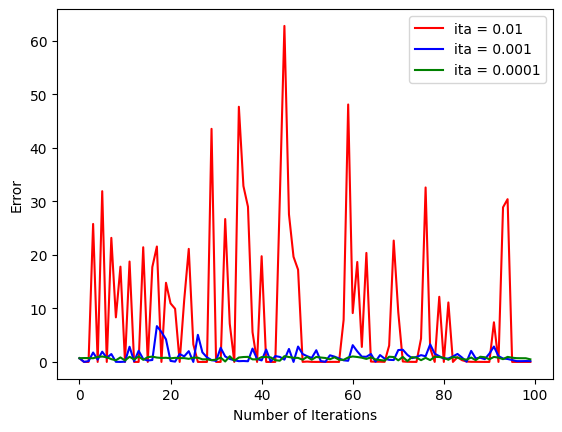

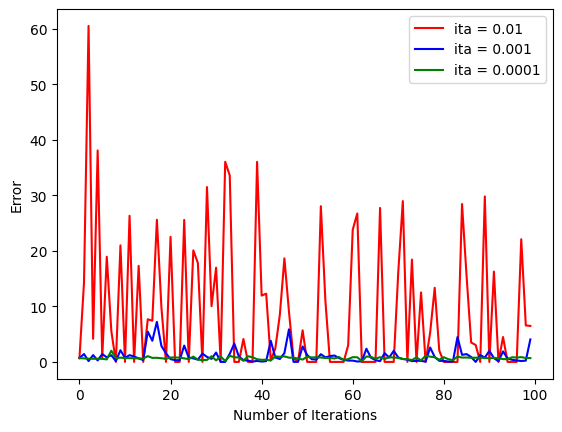

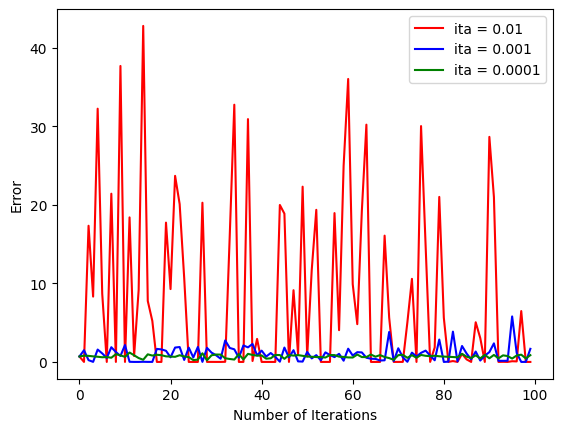

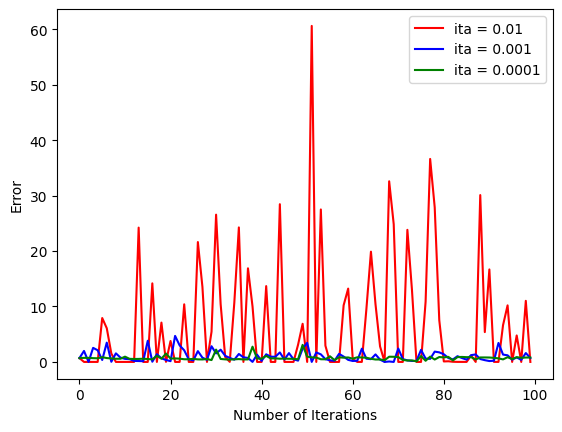

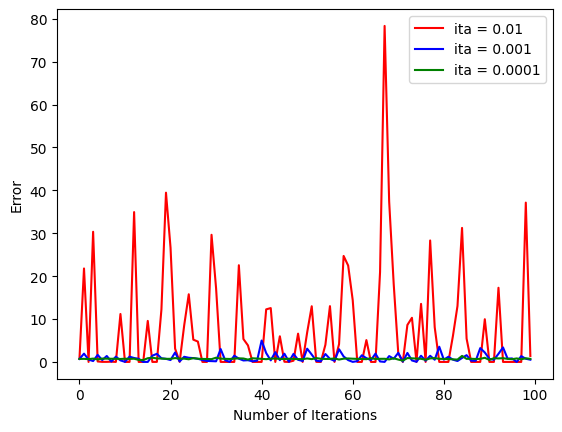

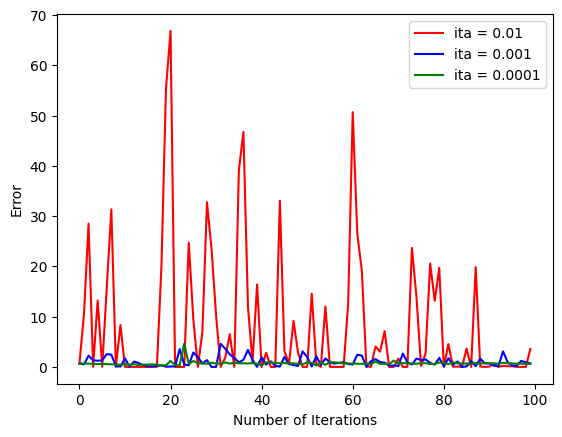

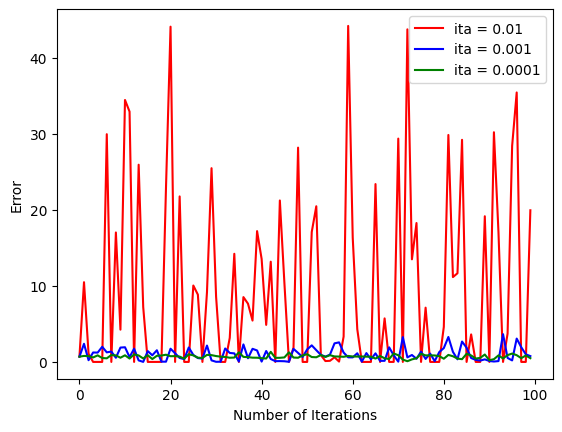

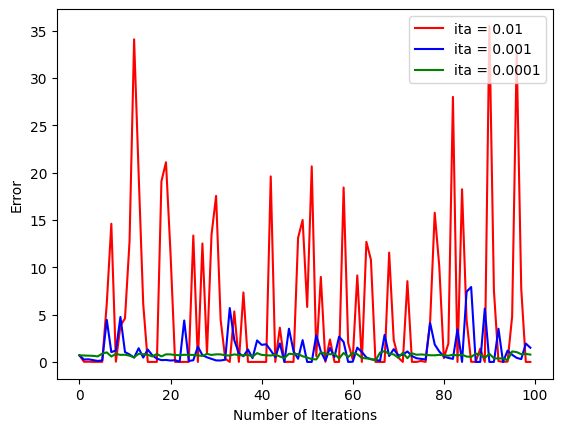

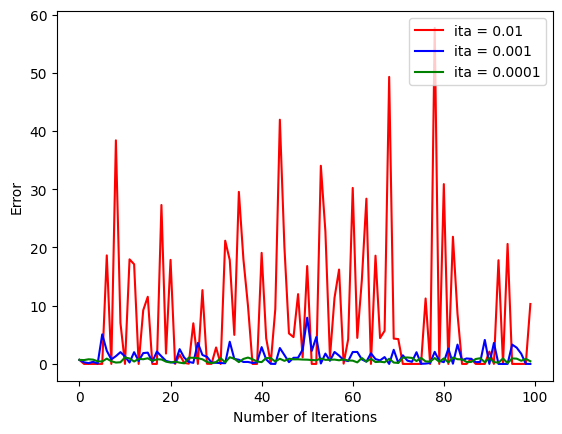

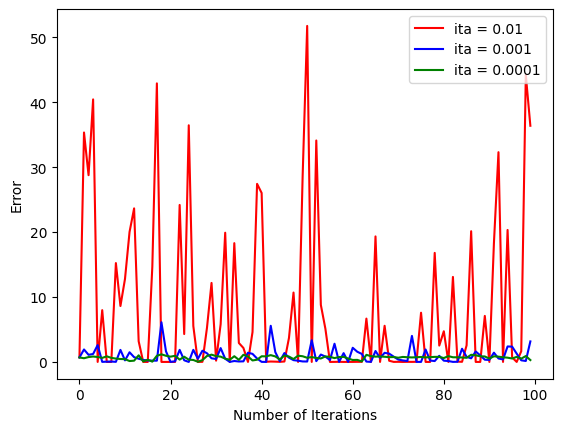

In [219]:
iters = 100
itas = [0.01,0.001,0.0001]
w_train_total_stoc = []
plot_data_total_stoc = []


for i in range(0,10):
    x_train_np = train_data[i]
    t_train_np = train_labels[i]
    N = x_train_np[:,0].size
    
    w_train_stoc = []
    plot_data_itas_stoc = []

    for ita in itas:
        w_req = w
        plot_data_stoc = []

        for iter in range(iters):
            random_int = random.randint(0,x_train_np[:,0].size-1)
            x_train_req = x_train_np[random_int,:]
            x_train_req = x_train_req.reshape(1,-1)
            y_req = target(w_req,x_train_req, iter)
            t_train_np = t_train_np.reshape(-1,1)
            t_train_req = t_train_np[random_int,:]
            t_train_req = t_train_req.reshape(-1,1)
            yMinusT = (y_req - t_train_req)
            error_der = (x_train_req.T).dot(yMinusT)
            w_req = w_req - ((1/N) * ita * error_der)
            for data in range(len(x_train_req)):
                if y_req[data] == 1:
                    y_req[data] = 0.99
            error1 = (((t_train_req.T).dot(np.log(y_req))) + (((1-t_train_req).T).dot(np.log(1-(y_req)))))
            error1.reshape(-1,1)
            error = -error1[0]

            plot_data_stoc.append(error)
        
        w_train_stoc.append(w_req)
        plot_data_itas_stoc.append(plot_data_stoc)
    w_train_total_stoc.append(w_train_stoc)
    plot_data_total_stoc.append(plot_data_itas_stoc)

for i in range(0,10):
    iterations = [x for x in range(0,iters)]
    fig,ax = plt.subplots()
    ax.plot(iterations,plot_data_total_stoc[i][0], color="red", label="ita = 0.01")
    ax.plot(iterations,plot_data_total_stoc[i][1], color="blue", label="ita = 0.001")
    ax.plot(iterations,plot_data_total_stoc[i][2], color="green", label="ita = 0.0001")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    ax.legend(loc = "upper right")
    plt.show()

In [220]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
correct_preds_total_stoc = []
wrong_preds_total_stoc = []
y_preds_total_stoc = []

for i in range(0,10):
    x_test_np = test_data[i]
    t_test_np = test_labels[i]
    correct_preds_stoc = []
    wrong_preds_stoc = []
    y_preds_stoc = []

    for thresh in range(len(thresholds)):

        for k in range(0,3):
            correct_pred_stoc = []
            wrong_pred_stoc = []
            y_pred_stoc = []
            w_test_req = np.asarray(w_train_total_stoc[i][k])

            for j in range(0,t_test_np.size):
                x_test_input = x_test_np[j,:]
                y_test = calculateValue(w_test_req,x_test_input)
                if y_test >= thresholds[thresh]:
                    roundedValue = 1
                else:
                    roundedValue = 0
                
                y_pred_stoc.append(roundedValue)
                if roundedValue - t_test_np[j] == 0:
                    correct_pred_stoc.append(j)
                else:
                    wrong_pred_stoc.append(j)
            
            y_preds_stoc.append(y_pred_stoc)
            correct_preds_stoc.append(correct_pred_stoc)
            wrong_preds_stoc.append(wrong_pred_stoc)
                    
    y_preds_total_stoc.append(y_preds_stoc)
    correct_preds_total_stoc.append(correct_preds_stoc)
    wrong_preds_total_stoc.append(wrong_preds_stoc)

y_preds_total_dataframe = []
for i in range(0,10):
    y_preds_total_dataframe.append(pd.DataFrame(y_preds_total_stoc[i]))
    y_preds_total_dataframe[i].insert(0, 'Threshold', ['0.5', '0.5','0.5','0.3','0.3','0.3','0.4','0.4','0.4','0.6','0.6',
                                  '0.6','0.7','0.7','0.7'])
    y_preds_total_dataframe[i].insert(1, 'ita', ['0.01', '0.001','0.0001','0.01','0.001','0.0001','0.01','0.001','0.0001','0.01','0.001',
                                  '0.0001','0.01','0.001','0.0001'])


for i in range(0,10):
    print(y_preds_total_dataframe[i])

   Threshold     ita  0  1  2  3  4  5  6  7  ...  178  179  180  181  182  \
0        0.5    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
1        0.5   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
2        0.5  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
3        0.3    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
4        0.3   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
5        0.3  0.0001  1  0  1  1  1  1  1  0  ...    1    1    1    0    0   
6        0.4    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
7        0.4   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
8        0.4  0.0001  1  0  1  1  0  0  0  0  ...    1    1    1    0    0   
9        0.6    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
10       0.6   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
11       0.6  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0

Accuracy, Precision and Recall

In [221]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
itas = [0.01,0.001,0.0001]
correct_preds_total_stoc = []
wrong_preds_total_stoc = []
y_preds_total_stoc = []

for i in range(0,10):
    x_test_np = test_data_nor[i]
    t_test_np = test_labels_nor[i]
    correct_preds_stoc = []
    wrong_preds_stoc = []
    y_preds_stoc = []

    for thresh in range(len(thresholds)):   
        correct_pred_stoc = []
        wrong_pred_stoc = []
        y_pred_stoc = []
        
        for k in range(0,3):
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            w_test_req = np.asarray(w_train_total_stoc[i][k])

            for j in range(0,t_test_np.size):
                x_test_input = x_test_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    y_pred_stoc = 1
                else:
                    y_pred_stoc = 0

                if y_pred_stoc == t_test_np[j]:
                    if y_pred_stoc == 1:
                        tp += 1
                    else:
                        tn += 1
                else:
                    if y_pred_stoc == 1:
                        fp += 1
                    else:
                        fn += 1
            
            y_preds_stoc.append(y_pred_stoc)
            correct_preds_stoc.append(tp)
            correct_preds_stoc.append(tn)
            wrong_preds_stoc.append(fp)
            wrong_preds_stoc.append(fn)

    y_preds_total_stoc.append(y_preds_stoc)
    correct_preds_total_stoc.append(correct_preds_stoc)
    wrong_preds_total_stoc.append(wrong_preds_stoc)
    

print(pd.DataFrame(correct_preds_total_stoc))
print(pd.DataFrame(wrong_preds_total_stoc))



for i in range(10):
    counter = 0
    Accuracy_table = []
    Precision_table = []
    Recall_table = []
    for thresh in range(0,5):
        for k in range(0,3):
            tp_total = correct_preds_total_stoc[i][counter]
            tn_total = correct_preds_total_stoc[i][counter + 1]
            fp_total = wrong_preds_total_stoc[i][counter]
            fn_total = wrong_preds_total_stoc[i][counter + 1]
            counter = counter + 2
            
            accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total)
            if(tp_total + fp_total) != 0:
                precision = tp_total / (tp_total + fp_total)
            else:
                precision = 0
            recall = tp_total / (tp_total + fn_total)
            
            Accuracy_table.append(accuracy * 100)
            Precision_table.append(precision * 100)
            Recall_table.append(recall * 100)
       
    
    print("Split:")
    print(i + 1)
    print()
    df1 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Accuracy": Accuracy_table
    })
    print("---ACCURACY---")
    pivot_Accuracy = df1.pivot_table(values="Accuracy", index="ita", columns="Threshold")
    print(pivot_Accuracy)
    print()
    
    df2 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Recall": Recall_table
    })
    print("---RECALL---")
    pivot_Recall = df2.pivot_table(values="Recall", index="ita", columns="Threshold")
    print(pivot_Recall)
    print()
    
    df3 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Precision": Precision_table
    })
    print("---PRECISION---")
    pivot_Precision = df3.pivot_table(values="Precision", index="ita", columns="Threshold")
    print(pivot_Precision)
    print()

lr1_accuracy = lr1_accuracy + 64.893617
lr1_precision = lr1_precision + 25.409836
lr1_recall = lr1_recall + 64.893617

   0   1   2   3    4   5    6   7    8   9   ...  20  21  22  23  24  25  26  \
0  19   7  10   9   51  22  115   0  115   0  ...   0  73   0  73   0  73   0   
1  29   6  54  22   30   7  129   0  129   0  ...   0  59   0  59   0  59   0   
2  21  10  18  10   29  19  122   0  122   0  ...   0  66   0  66   0  66   0   
3  23   9   8   5   15   4  118   0  118   0  ...   0  70   0  70   0  70   0   
4  13   6  12   5   18   4  119   0  119   0  ...   0  69   0  69   0  69   0   
5  33  13  15   8   13  12  122   0  122   0  ...   0  66   0  66   0  66   0   
6  20   8  19   7   93  47  119   0  119   0  ...   0  69   0  69   0  69   0   
7  14   8  16   7   27  16  114   0  114   0  ...   0  74   0  74   0  74   0   
8  56  30  29  11  102  48  111   0  111   0  ...   0  77   0  77   0  77   0   
9  65  33  12   9   85  39  121   0  121   0  ...   0  67   0  67   0  67   0   

   27  28  29  
0  73   0  73  
1  59   0  59  
2  66   0  66  
3  70   0  70  
4  69   0  69  
5  66   0  6

In [238]:
lr1_accuracy = lr1_accuracy/300
lr1_precision = lr1_precision/300
lr1_recall = lr1_recall/300

<h1>Logistic Regression on Normalised Data (LR2)</h1>

In [239]:
w_nor = np.zeros((30,1), dtype=float)
w_nor.shape

(30, 1)

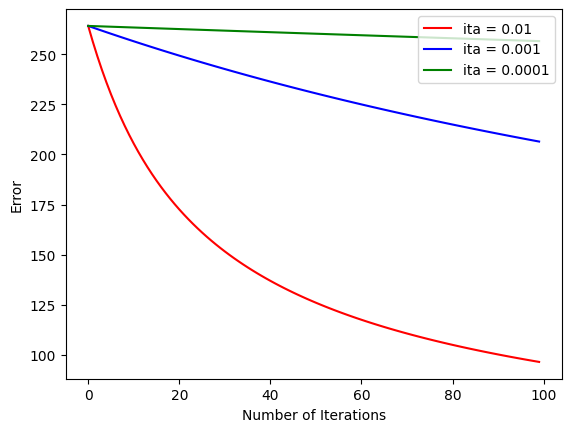

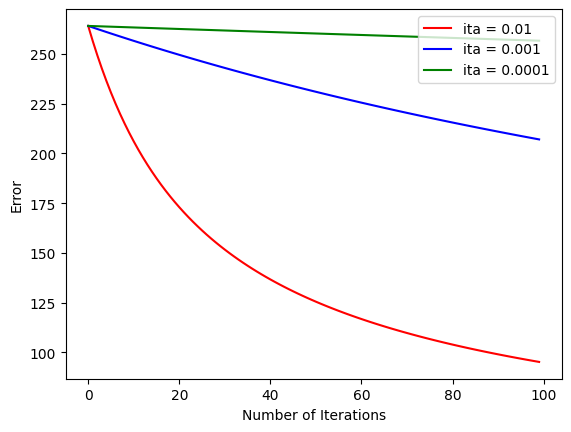

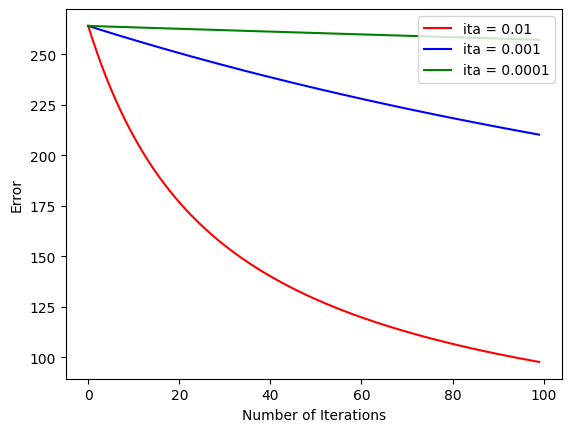

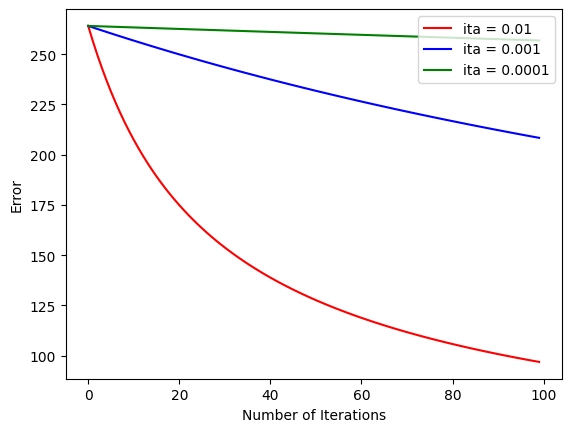

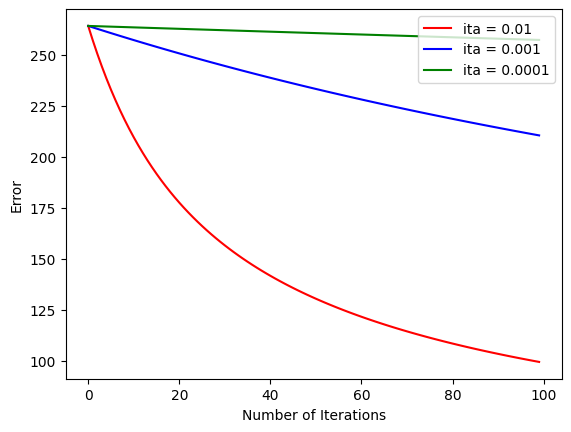

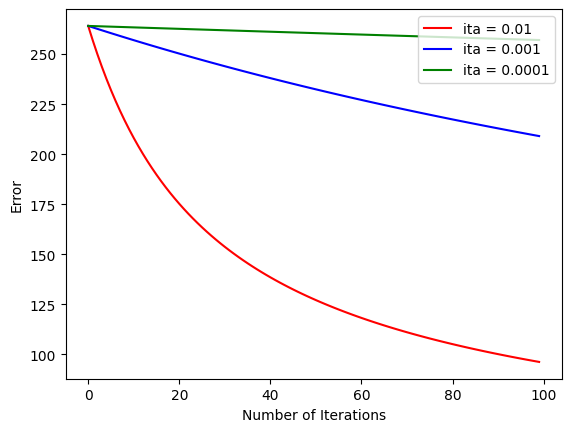

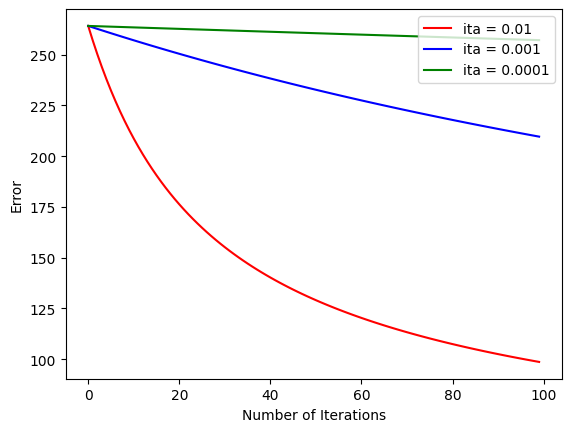

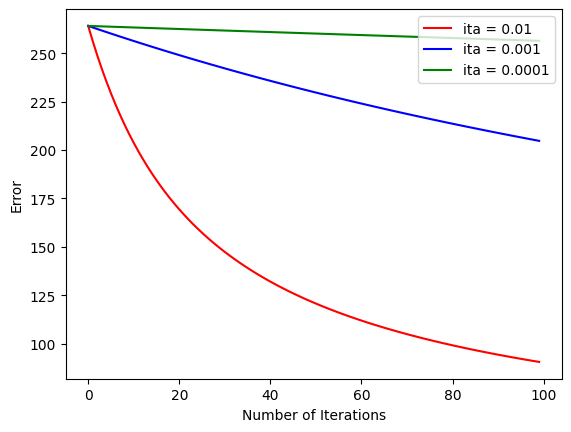

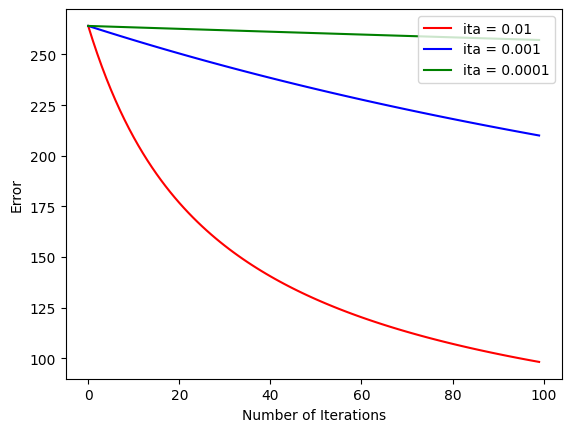

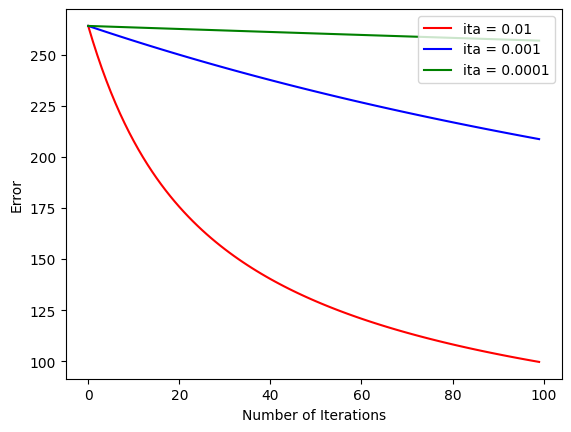

In [240]:
iters = 100
itas = [0.01,0.001,0.0001]
w_train_nor_total = []
plot_data_nor_total = []

for i in range(0,10):
    x_train_nor_np = train_data_nor[i]
    t_train_nor_np = train_labels_nor[i]
    N = x_train_nor_np[:,0].size

    w_train_nor = []
    plot_data_nor_itas = []

    for ita in range(0,len(itas)):
        w_req = w_nor
        plot_data_nor = []

        for iter in range(iters):
            x_train_req_nor = x_train_nor_np
            y_n = target(w_req,x_train_req_nor, iter)
            t_train_nor_np = t_train_nor_np.reshape(-1,1)
            yMinusT = (y_n - t_train_nor_np)
            error_der = (x_train_req_nor.T).dot(yMinusT)
            w_req = w_req - ((1/N) * itas[ita] * error_der)
            for data in range(len(x_train_np)):
                if y_n[data] == 1:
                    y_n[data] = 0.99
            error1 = (((t_train_nor_np.T).dot(np.log(y_n))) + (((1-t_train_nor_np).T).dot(np.log(1-(y_n)))))
            error1.reshape(-1,1)
            error = -error1[0]
            plot_data_nor.append(error)
        
        w_train_nor.append(w_req)
        plot_data_nor_itas.append(plot_data_nor)
    w_train_nor_total.append(w_train_nor)
    plot_data_nor_total.append(plot_data_nor_itas)

for i in range(0,10):
    iterations = [x for x in range(0,iters)]
    fig,ax = plt.subplots()
    ax.plot(iterations,plot_data_nor_total[i][0], color="red", label="ita = 0.01")
    ax.plot(iterations,plot_data_nor_total[i][1], color="blue", label="ita = 0.001")
    ax.plot(iterations,plot_data_nor_total[i][2], color="green", label="ita = 0.0001")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    ax.legend(loc = "upper right")
    plt.show()

In [241]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
correct_preds_nor_total = []
wrong_preds_nor_total = []
y_preds_nor_total = []

for i in range(0,10):
    x_test_nor_np = test_data_nor[i]
    t_test_nor_np = test_labels_nor[i]
    correct_preds_nor = []
    wrong_preds_nor = []
    y_preds_nor = []

    for thresh in range(len(thresholds)):

        for k in range(0,3):
            correct_pred_nor = []
            wrong_pred_nor = []
            y_pred_nor = []
            w_test_req = np.asarray(w_train_nor_total[i][k])

            for j in range(0,t_test_nor_np.size):
                x_test_input = x_test_nor_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    roundedValue = 1
                else:
                    roundedValue = 0

                y_pred_nor.append(roundedValue)
                if roundedValue - t_test_nor_np[j] == 0:
                    correct_pred_nor.append(j)
                else:
                    wrong_pred_nor.append(j)
            
            y_preds_nor.append(y_pred_nor)
            correct_preds_nor.append(correct_pred_nor)
            wrong_preds_nor.append(wrong_pred_nor)
    
    y_preds_nor_total.append(y_preds_nor)
    correct_preds_nor_total.append(correct_preds_nor)
    wrong_preds_nor_total.append(wrong_preds_nor)
    
    
y_preds_nor_total_dataframe = []
for i in range(0,10):
    y_preds_nor_total_dataframe.append(pd.DataFrame(y_preds_nor_total[i]))
    y_preds_nor_total_dataframe[i].insert(0, 'Threshold', ['0.5', '0.5','0.5','0.3','0.3','0.3','0.4','0.4','0.4','0.6','0.6',
                                  '0.6','0.7','0.7','0.7'])
    y_preds_nor_total_dataframe[i].insert(1, 'ita', ['0.01', '0.001','0.0001','0.01','0.001','0.0001','0.01','0.001','0.0001','0.01','0.001',
                                  '0.0001','0.01','0.001','0.0001'])


for i in range(0,10):
    print(y_preds_nor_total_dataframe[i])

   Threshold     ita  0  1  2  3  4  5  6  7  ...  178  179  180  181  182  \
0        0.5    0.01  1  1  0  0  0  0  0  1  ...    1    1    0    1    0   
1        0.5   0.001  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
2        0.5  0.0001  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
3        0.3    0.01  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
4        0.3   0.001  1  1  1  1  1  0  1  1  ...    1    1    1    1    1   
5        0.3  0.0001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
6        0.4    0.01  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
7        0.4   0.001  1  1  1  1  1  0  0  1  ...    1    1    1    1    0   
8        0.4  0.0001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
9        0.6    0.01  1  1  0  0  0  0  0  1  ...    1    0    0    1    0   
10       0.6   0.001  1  0  0  0  0  0  0  1  ...    0    0    0    1    0   
11       0.6  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0

Accuracy, Precision and Recall 

In [242]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
itas = [0.01,0.001,0.0001]
correct_preds_nor_total = []
wrong_preds_nor_total = []
y_preds_nor_total = []
lr2_accuracy = 0
lr2_precision = 0
lr2_recall = 0

for i in range(0,10):
    x_test_nor_np = test_data_nor[i]
    t_test_nor_np = test_labels_nor[i]
    correct_preds_nor = []
    wrong_preds_nor = []
    y_preds_nor = []

    for thresh in range(len(thresholds)):
       
        correct_pred_nor = []
        wrong_pred_nor = []
        y_pred_nor = []
        
        for k in range(0,3):
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            w_test_req = np.asarray(w_train_nor_total[i][k])

            for j in range(0,t_test_nor_np.size):
                x_test_input = x_test_nor_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    y_pred_nor = 1
                else:
                    y_pred_nor = 0

                if y_pred_nor == t_test_nor_np[j]:
                    if y_pred_nor == 1:
                        tp += 1
                    else:
                        tn += 1
                else:
                    if y_pred_nor == 1:
                        fp += 1
                    else:
                        fn += 1

            y_preds_nor.append(y_pred_nor)
            correct_preds_nor.append(tp)
            correct_preds_nor.append(tn)
            wrong_preds_nor.append(fp)
            wrong_preds_nor.append(fn)

    y_preds_nor_total.append(y_preds_nor)
    correct_preds_nor_total.append(correct_preds_nor)
    wrong_preds_nor_total.append(wrong_preds_nor)

print(pd.DataFrame(correct_preds_nor_total))
print(pd.DataFrame(wrong_preds_nor_total))



for i in range(10):
    counter = 0
    Accuracy_table = []
    Precision_table = []
    Recall_table = []
    for thresh in range(0,5):
        for k in range(0,3):
            tp_total = correct_preds_nor_total[i][counter]
            tn_total = correct_preds_nor_total[i][counter + 1]
            fp_total = wrong_preds_nor_total[i][counter]
            fn_total = wrong_preds_nor_total[i][counter + 1]
            counter = counter + 2
            
            accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total)
            if(tp_total + fp_total) != 0:
                precision = tp_total / (tp_total + fp_total)
            else:
                precision = 0
            recall = tp_total / (tp_total + fn_total)
            
            Accuracy_table.append(accuracy * 100)
            Precision_table.append(precision * 100)
            Recall_table.append(recall * 100)

    
    print("Split:")
    print(i + 1)
    print()
    df1 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Accuracy": Accuracy_table
    })
    print("---ACCURACY---")
    pivot_Accuracy = df1.pivot_table(values="Accuracy", index="ita", columns="Threshold")
    print(pivot_Accuracy)
    print()
    
    df2 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Recall": Recall_table
    })
    print("---RECALL---")
    pivot_Recall = df2.pivot_table(values="Recall", index="ita", columns="Threshold")
    print(pivot_Recall)
    print()
    
    df3 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Precision": Precision_table
    })
    print("---PRECISION---")
    pivot_Precision = df3.pivot_table(values="Precision", index="ita", columns="Threshold")
    print(pivot_Precision)
    print()

lr2_accuracy = lr2_accuracy + 96.276596
lr2_precision = lr2_precision + 96.460177
lr2_recall = lr2_recall + 97.321429

    0   1    2   3    4   5    6   7    8   9   ...  20  21  22  23  24  25  \
0  111  71  111  69  110  68  115  59  115   7  ...  17  73   0  73  86  73   
1  123  55  122  54  121  52  129  48  129   9  ...  25  59   0  59  98  59   
2  119  62  117  62  116  62  121  55  122  12  ...  19  66   0  66  94  64   
3  111  64  109  63  109  63  117  58  118   8  ...  23  70   0  70  93  69   
4  114  66  113  65  113  64  119  59  119   9  ...  23  69   0  69  86  69   
5  117  62  116  60  116  59  121  56  122  13  ...  23  66   0  66  94  66   
6  113  65  111  65  111  65  119  58  119  11  ...  17  69   0  69  96  69   
7  105  69  102  68  101  68  112  60  114  11  ...  18  74   0  74  77  72   
8  104  73  104  72  104  72  110  64  111   9  ...  29  77   0  77  85  77   
9  115  65  115  62  115  62  120  57  121   9  ...  26  67   0  67  99  66   

   26  27  28  29  
0   0  73   0  73  
1   0  59   0  59  
2   0  66   0  66  
3   0  70   0  70  
4   0  69   0  69  
5   0  66 

<h3>Batch Gradient Descent</h3>
(Normalized Data)

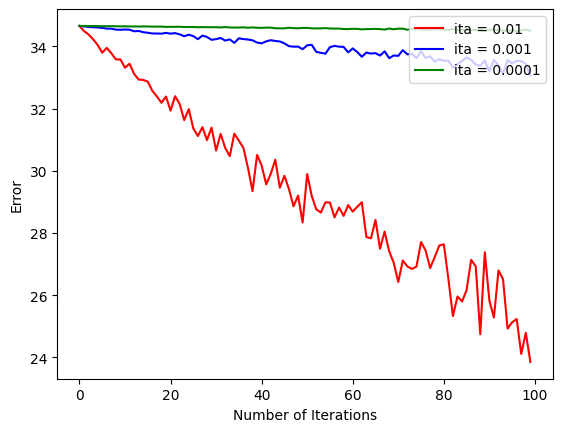

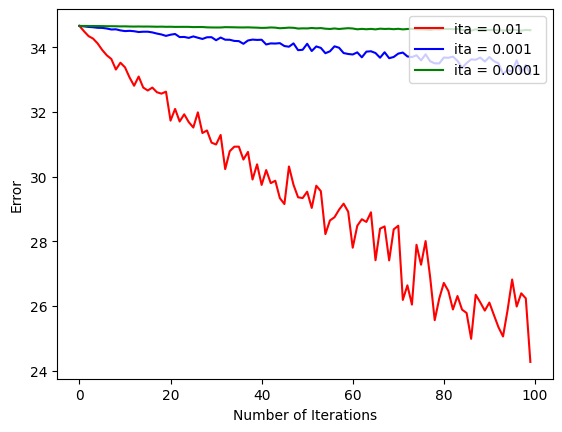

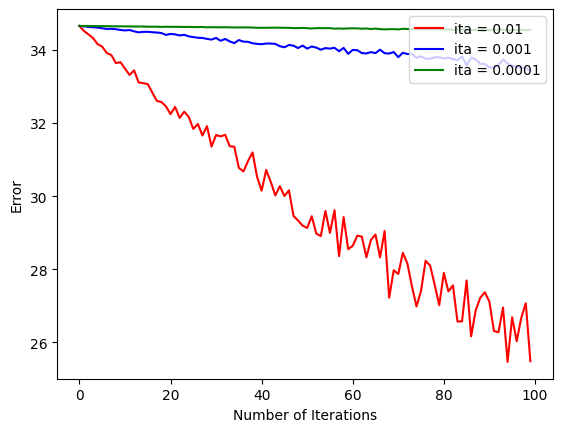

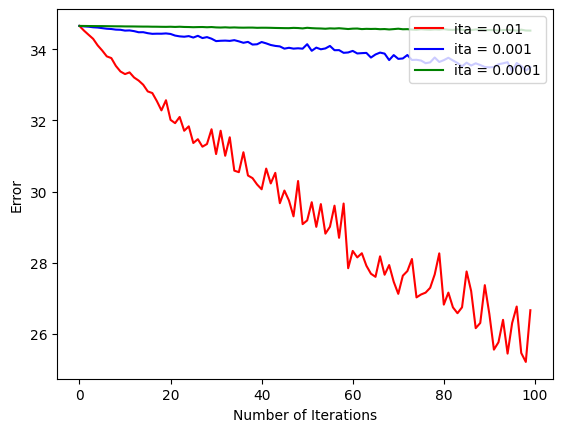

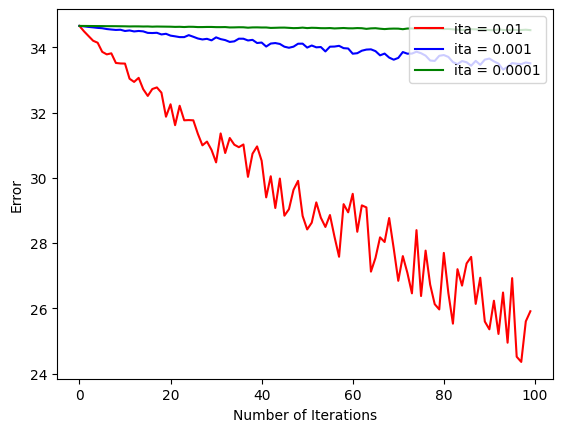

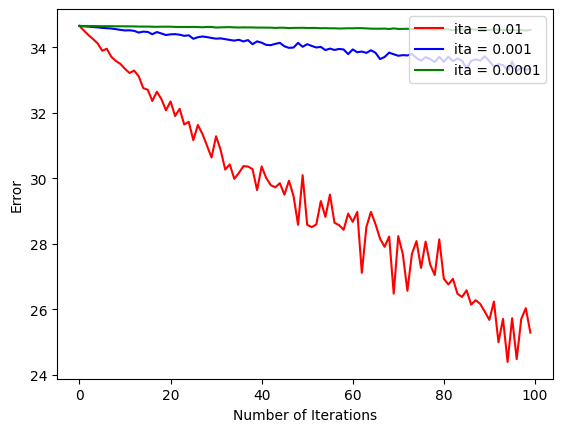

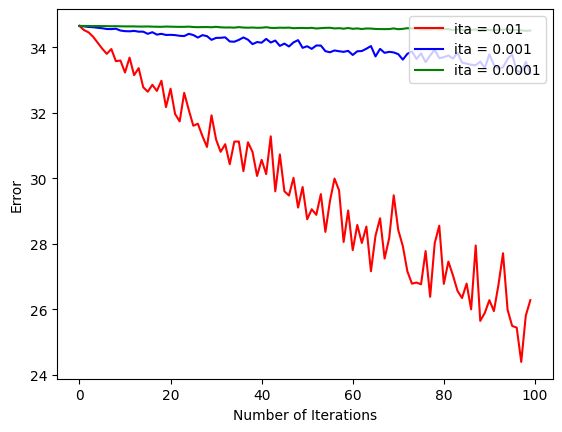

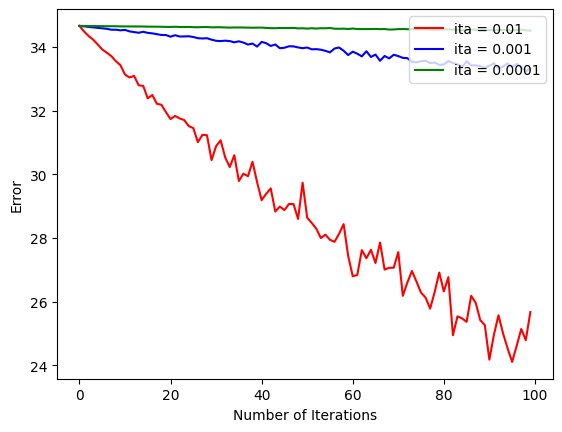

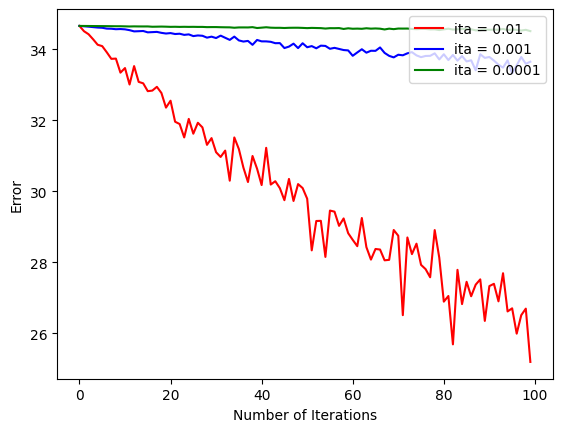

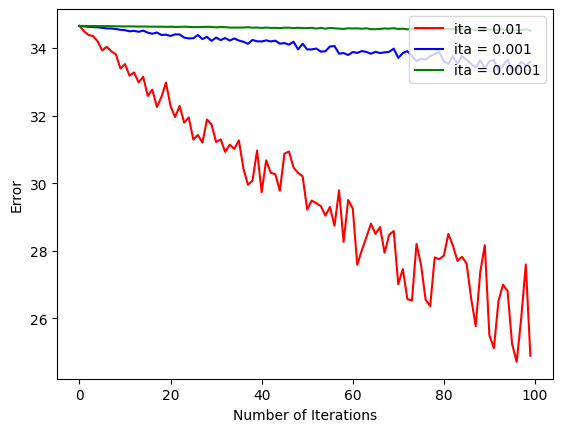

In [243]:
iters = 100
itas = [0.01,0.001,0.0001]
w_train_nor_total_batch = []
plot_data_nor_total_batch = []


for i in range(0,10):
    x_train_nor_np = train_data_nor[i]
    t_train_nor_np = train_labels_nor[i]
    N = x_train_nor_np[:,0].size

    w_train_nor_batch = []
    plot_data_nor_itas_batch = []

    for ita in range(0,len(itas)):
        w_req = w_nor
        plot_data_nor_batch = []

        for iter in range(iters):
            random_int = random.randint(0,x_train_np[:,0].size-51)
            x_train_req_nor = x_train_nor_np[random_int:(random_int+50),:]
            y_n = target(w_req,x_train_req_nor, iter)
            t_train_nor_np = t_train_nor_np.reshape(-1,1)
            t_train_req_nor = t_train_nor_np[random_int:(random_int+50),:]
            t_train_req_nor = t_train_req_nor.reshape(-1,1)
            yMinusT = (y_n - t_train_req_nor)
            error_der = (x_train_req_nor.T).dot(yMinusT)
            w_req = w_req - ((1/N) * itas[ita] * error_der)
            for data in range(len(x_train_req_nor)):
                if y_n[data] == 1:
                    y_n[data] = 0.99
            error1 = (((t_train_req_nor.T).dot(np.log(y_n))) + (((1-t_train_req_nor).T).dot(np.log(1-(y_n)))))
            error1.reshape(-1,1)
            error = -error1[0]
            plot_data_nor_batch.append(error)
        
        w_train_nor_batch.append(w_req)
        plot_data_nor_itas_batch.append(plot_data_nor_batch)
    w_train_nor_total_batch.append(w_train_nor_batch)
    plot_data_nor_total_batch.append(plot_data_nor_itas_batch)

for i in range(0,10):
    iterations = [x for x in range(0,iters)]
    fig,ax = plt.subplots()
    ax.plot(iterations,plot_data_nor_total_batch[i][0], color="red", label="ita = 0.01")
    ax.plot(iterations,plot_data_nor_total_batch[i][1], color="blue", label="ita = 0.001")
    ax.plot(iterations,plot_data_nor_total_batch[i][2], color="green", label="ita = 0.0001")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    ax.legend(loc = "upper right")
    plt.show()

In [244]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
correct_preds_nor_total_batch = []
wrong_preds_nor_total_batch = []
y_preds_nor_total_batch = []

for i in range(0,10):
    x_test_nor_np = test_data_nor[i]
    t_test_nor_np = test_labels_nor[i]
    correct_preds_nor_batch = []
    wrong_preds_nor_batch = []
    y_preds_nor_batch = []

    for thresh in range(len(thresholds)):

        for k in range(0,3):
            correct_pred_nor_batch = []
            wrong_pred_nor_batch = []
            y_pred_nor_batch = []
            w_test_req = np.asarray(w_train_nor_total_batch[i][k])

            for j in range(0,t_test_nor_np.size):
                x_test_input = x_test_nor_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    roundedValue = 1
                else:
                    roundedValue = 0

                y_pred_nor_batch.append(roundedValue)
                if roundedValue - t_test_nor_np[j] == 0:
                    correct_pred_nor_batch.append(j)
                else:
                    wrong_pred_nor_batch.append(j)
            
            y_preds_nor_batch.append(y_pred_nor_batch)
            correct_preds_nor_batch.append(correct_pred_nor_batch)
            wrong_preds_nor_batch.append(wrong_pred_nor_batch)
    
    y_preds_nor_total_batch.append(y_preds_nor_batch)
    correct_preds_nor_total_batch.append(correct_preds_nor_batch)
    wrong_preds_nor_total_batch.append(wrong_preds_nor_batch)


y_preds_nor_total_dataframe = []
for i in range(0,10):
    y_preds_nor_total_dataframe.append(pd.DataFrame(y_preds_nor_total_batch[i]))
    y_preds_nor_total_dataframe[i].insert(0, 'Threshold', ['0.5', '0.5','0.5','0.3','0.3','0.3','0.4','0.4','0.4','0.6','0.6',
                                  '0.6','0.7','0.7','0.7'])
    y_preds_nor_total_dataframe[i].insert(1, 'ita', ['0.01', '0.001','0.0001','0.01','0.001','0.0001','0.01','0.001','0.0001','0.01','0.001',
                                  '0.0001','0.01','0.001','0.0001'])


for i in range(0,10):
    print(y_preds_nor_total_dataframe[i])



   Threshold     ita  0  1  2  3  4  5  6  7  ...  178  179  180  181  182  \
0        0.5    0.01  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
1        0.5   0.001  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
2        0.5  0.0001  1  1  1  0  0  0  0  1  ...    1    1    0    1    0   
3        0.3    0.01  1  1  1  1  1  0  1  1  ...    1    1    1    1    1   
4        0.3   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
5        0.3  0.0001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
6        0.4    0.01  1  1  1  1  0  0  0  1  ...    1    1    0    1    0   
7        0.4   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
8        0.4  0.0001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
9        0.6    0.01  1  1  0  0  0  0  0  1  ...    0    0    0    1    0   
10       0.6   0.001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
11       0.6  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0

Accuracy, Precision and Recall

In [245]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
itas = [0.01,0.001,0.0001]
correct_preds_nor_total_batch = []
wrong_preds_nor_total_batch = []
y_preds_nor_total_batch = []

for i in range(0,10):
    x_test_nor_np = test_data_nor[i]
    t_test_nor_np = test_labels_nor[i]
    correct_preds_nor_batch = []
    wrong_preds_nor_batch = []
    y_preds_nor_batch = []

    for thresh in range(len(thresholds)):   
        correct_pred_nor_batch = []
        wrong_pred_nor_batch = []
        y_pred_nor_batch = []
        
        for k in range(0,3):
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            w_test_req = np.asarray(w_train_nor_total_batch[i][k])

            for j in range(0,t_test_nor_np.size):
                x_test_input = x_test_nor_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    y_pred_nor_batch = 1
                else:
                    y_pred_nor_batch = 0

                if y_pred_nor_batch == t_test_nor_np[j]:
                    if y_pred_nor_batch == 1:
                        tp += 1
                    else:
                        tn += 1
                else:
                    if y_pred_nor_batch == 1:
                        fp += 1
                    else:
                        fn += 1
            
            y_preds_nor_batch.append(y_pred_nor_batch)
            correct_preds_nor_batch.append(tp)
            correct_preds_nor_batch.append(tn)
            wrong_preds_nor_batch.append(fp)
            wrong_preds_nor_batch.append(fn)

    y_preds_nor_total_batch.append(y_preds_nor_batch)
    correct_preds_nor_total_batch.append(correct_preds_nor_batch)
    wrong_preds_nor_total_batch.append(wrong_preds_nor_batch)
    

print(pd.DataFrame(correct_preds_nor_total_batch))
print(pd.DataFrame(wrong_preds_nor_total_batch))



for i in range(10):
    counter = 0
    Accuracy_table = []
    Precision_table = []
    Recall_table = []
    for thresh in range(0,5):
        for k in range(0,3):
            tp_total = correct_preds_nor_total_batch[i][counter]
            tn_total = correct_preds_nor_total_batch[i][counter + 1]
            fp_total = wrong_preds_nor_total_batch[i][counter]
            fn_total = wrong_preds_nor_total_batch[i][counter + 1]
            counter = counter + 2
            
            accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total)
            if(tp_total + fp_total) != 0:
                precision = tp_total / (tp_total + fp_total)
            else:
                precision = 0
            recall = tp_total / (tp_total + fn_total)
            
            Accuracy_table.append(accuracy * 100)
            Precision_table.append(precision * 100)
            Recall_table.append(recall * 100)
       
    
    print("Split:")
    print(i + 1)
    print()
    df1 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Accuracy": Accuracy_table
    })
    print("---ACCURACY---")
    pivot_Accuracy = df1.pivot_table(values="Accuracy", index="ita", columns="Threshold")
    print(pivot_Accuracy)
    print()
    
    df2 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Recall": Recall_table
    })
    print("---RECALL---")
    pivot_Recall = df2.pivot_table(values="Recall", index="ita", columns="Threshold")
    print(pivot_Recall)
    print()
    
    df3 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Precision": Precision_table
    })
    print("---PRECISION---")
    pivot_Precision = df3.pivot_table(values="Precision", index="ita", columns="Threshold")
    print(pivot_Precision)
    print()

lr2_accuracy = lr2_accuracy + 96.276596
lr2_precision = lr2_precision + 96.460177
lr2_recall = lr2_recall + 97.321429

    0   1    2   3    4   5    6   7    8   9   ...  20  21  22  23  24  25  \
0  111  70  111  68  110  68  115  10  115   0  ...   0  73   0  73   0  73   
1  121  53  121  52  121  52  129  13  129   0  ...   0  59   0  59   1  59   
2  116  62  115  62  116  62  122  18  122   0  ...   0  66   0  66   0  66   
3  109  63  109  63  109  63  118  15  118   0  ...   0  70   0  70   0  70   
4  113  64  113  64  113  64  119  13  119   0  ...   0  69   0  69   0  69   
5  116  59  116  59  116  59  122  18  122   0  ...   0  66   0  66   1  66   
6  112  65  111  63  111  65  119  16  119   0  ...   0  69   0  69   0  69   
7  101  69  101  68  100  68  114  16  114   0  ...   0  74   0  74   0  74   
8  104  73  103  73  104  72  111  15  111   0  ...   0  77   0  77   0  77   
9  115  62  114  62  114  62  121  14  121   0  ...   0  67   0  67   0  67   

   26  27  28  29  
0   0  73   0  73  
1   0  59   0  59  
2   0  66   0  66  
3   0  70   0  70  
4   0  69   0  69  
5   0  66 

<h2> Stochastic Gradient Descent </h2>
(Normalized Data)

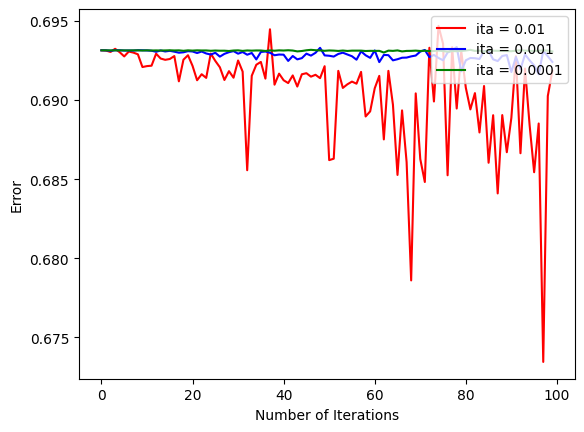

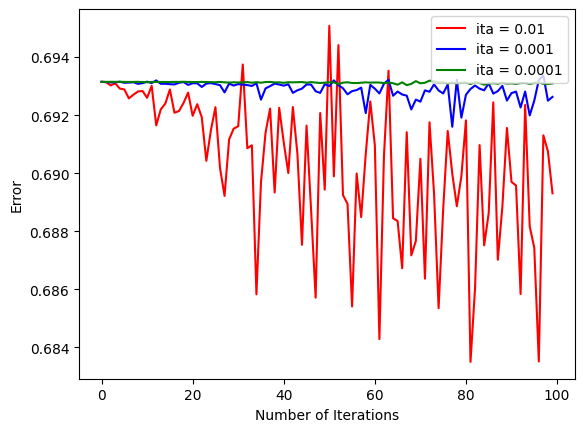

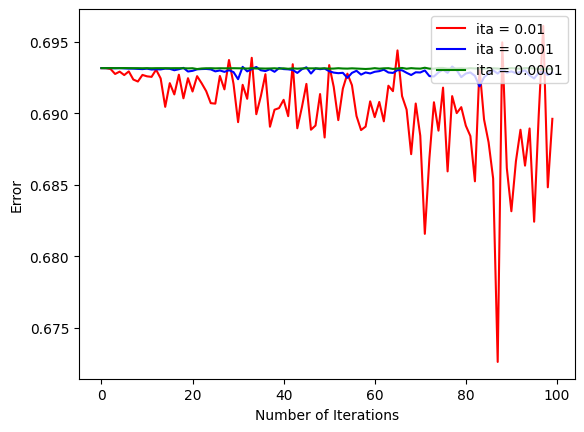

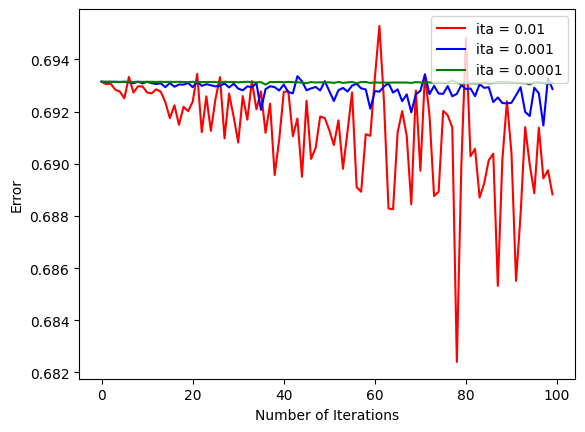

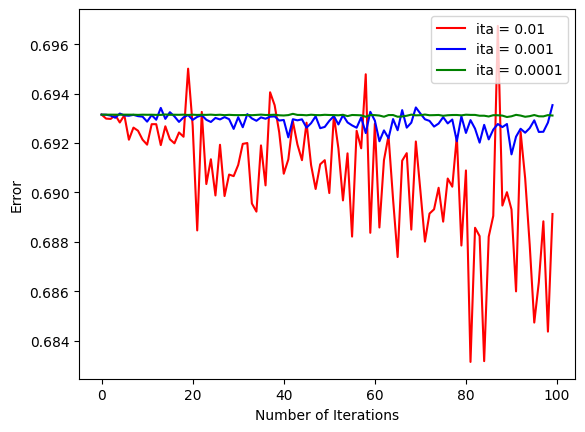

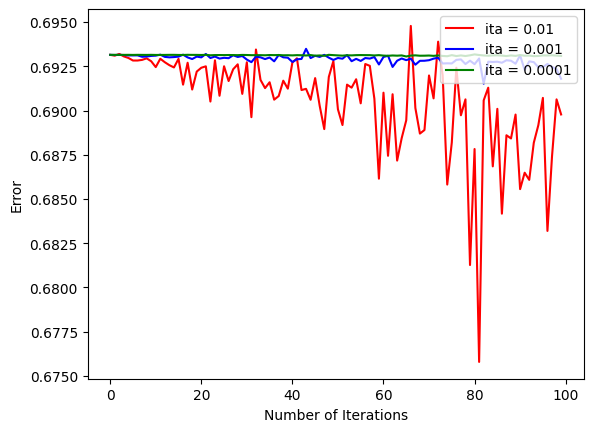

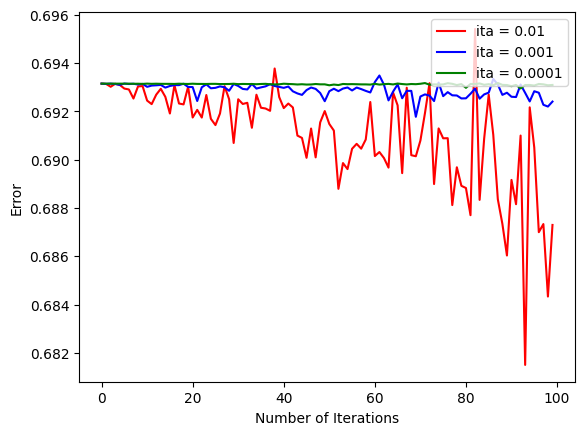

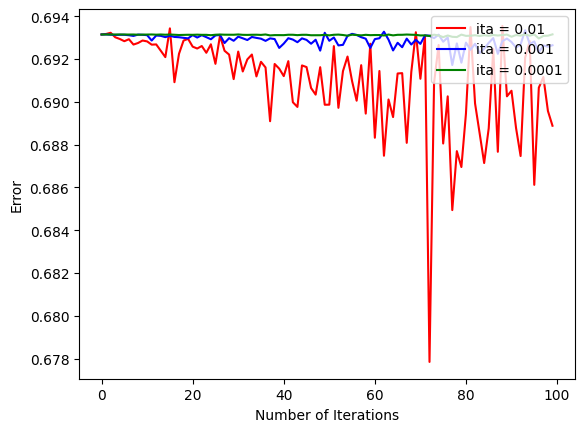

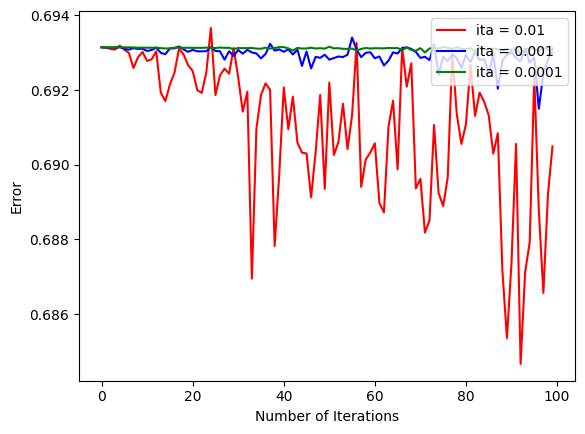

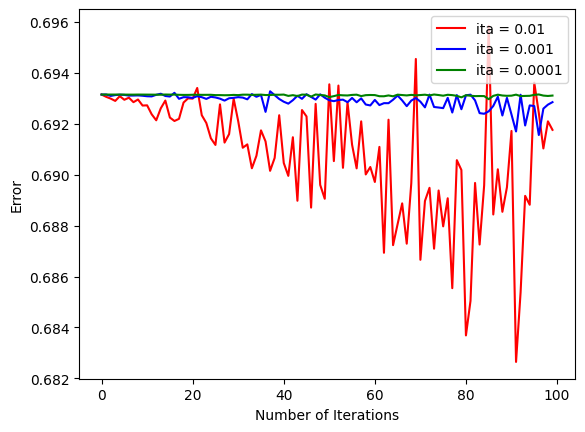

In [246]:
iters = 100
itas = [0.01,0.001,0.0001]
w_train_nor_total_stoc = []
plot_data_nor_total_stoc = []

for i in range(0,10):
    x_train_nor_np = train_data_nor[i]
    t_train_nor_np = train_labels_nor[i]
    N = x_train_nor_np[:,0].size

    w_train_nor_stoc = []
    plot_data_nor_itas_stoc = []

    for ita in range(0,len(itas)):
        w_req = w_nor
        plot_data_nor_stoc = []

        for iter in range(iters):
            random_int = random.randint(0,x_train_np[:,0].size-51)
            x_train_req_nor = x_train_nor_np[random_int,:]
            x_train_req_nor = x_train_req_nor.reshape(1,-1)
            y_n = target(w_req,x_train_req_nor, iter)
            t_train_nor_np = t_train_nor_np.reshape(-1,1)
            t_train_req_nor = t_train_nor_np[random_int,:]
            t_train_req_nor = t_train_req_nor.reshape(-1,1)
            yMinusT = (y_n - t_train_req_nor)
            error_der = (x_train_req_nor.T).dot(yMinusT)
            w_req = w_req - ((1/N) * itas[ita] * error_der)
            for data in range(len(x_train_req_nor)):
                if y_n[data] == 1:
                    y_n[data] = 0.99
            error1 = (((t_train_req_nor.T).dot(np.log(y_n))) + (((1-t_train_req_nor).T).dot(np.log(1-(y_n)))))
            error1.reshape(-1,1)
            error = -error1[0]
            plot_data_nor_stoc.append(error)
        
        w_train_nor_stoc.append(w_req)
        plot_data_nor_itas_stoc.append(plot_data_nor_stoc)
    w_train_nor_total_stoc.append(w_train_nor_stoc)
    plot_data_nor_total_stoc.append(plot_data_nor_itas_stoc)

for i in range(0,10):
    iterations = [x for x in range(0,iters)]
    fig,ax = plt.subplots()
    ax.plot(iterations,plot_data_nor_total_stoc[i][0], color="red", label="ita = 0.01")
    ax.plot(iterations,plot_data_nor_total_stoc[i][1], color="blue", label="ita = 0.001")
    ax.plot(iterations,plot_data_nor_total_stoc[i][2], color="green", label="ita = 0.0001")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Error")
    ax.legend(loc = "upper right")
    plt.show()

In [247]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
correct_preds_nor_total_stoc = []
wrong_preds_nor_total_stoc = []
y_preds_nor_total_stoc = []

for i in range(0,10):
    x_test_nor_np = test_data_nor[i]
    t_test_nor_np = test_labels_nor[i]
    correct_preds_nor_stoc = []
    wrong_preds_nor_stoc = []
    y_preds_nor_stoc = []

    for thresh in range(len(thresholds)):

        for k in range(0,3):
            correct_pred_nor_stoc = []
            wrong_pred_nor_stoc = []
            y_pred_nor_stoc = []
            w_test_req = np.asarray(w_train_nor_total_stoc[i][k])

            for j in range(0,t_test_nor_np.size):
                x_test_input = x_test_nor_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    roundedValue = 1
                else:
                    roundedValue = 0

                y_pred_nor_stoc.append(roundedValue)
                if roundedValue - t_test_nor_np[j] == 0:
                    correct_pred_nor_stoc.append(j)
                else:
                    wrong_pred_nor_stoc.append(j)
            
            y_preds_nor_stoc.append(y_pred_nor_stoc)
            correct_preds_nor_stoc.append(correct_pred_nor_stoc)
            wrong_preds_nor_stoc.append(wrong_pred_nor_stoc)
    
    y_preds_nor_total_stoc.append(y_preds_nor_stoc)
    correct_preds_nor_total_stoc.append(correct_preds_nor_stoc)
    wrong_preds_nor_total_stoc.append(wrong_preds_nor_stoc)

    
y_preds_nor_total_dataframe = []
for i in range(0,10):
    y_preds_nor_total_dataframe.append(pd.DataFrame(y_preds_nor_total_stoc[i]))
    y_preds_nor_total_dataframe[i].insert(0, 'Threshold', ['0.5', '0.5','0.5','0.3','0.3','0.3','0.4','0.4','0.4','0.6','0.6',
                                  '0.6','0.7','0.7','0.7'])
    y_preds_nor_total_dataframe[i].insert(1, 'ita', ['0.01', '0.001','0.0001','0.01','0.001','0.0001','0.01','0.001','0.0001','0.01','0.001',
                                  '0.0001','0.01','0.001','0.0001'])


for i in range(0,10):
    print(y_preds_nor_total_dataframe[i])

   Threshold     ita  0  1  2  3  4  5  6  7  ...  178  179  180  181  182  \
0        0.5    0.01  1  1  0  0  0  0  0  1  ...    1    1    0    1    0   
1        0.5   0.001  1  1  0  0  0  0  0  1  ...    1    1    0    1    0   
2        0.5  0.0001  1  1  0  0  0  0  0  1  ...    1    0    0    1    0   
3        0.3    0.01  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
4        0.3   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
5        0.3  0.0001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
6        0.4    0.01  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
7        0.4   0.001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
8        0.4  0.0001  1  1  1  1  1  1  1  1  ...    1    1    1    1    1   
9        0.6    0.01  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
10       0.6   0.001  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
11       0.6  0.0001  0  0  0  0  0  0  0  0  ...    0    0    0

Accuracy, Recall and Precision

In [248]:
thresholds = [0.5,0.3,0.4,0.6,0.7]
itas = [0.01,0.001,0.0001]
correct_preds_nor_total_stoc = []
wrong_preds_nor_total_stoc = []
y_preds_nor_total_stoc = []

for i in range(0,10):
    x_test_nor_np = test_data_nor[i]
    t_test_nor_np = test_labels_nor[i]
    correct_preds_nor_stoc = []
    wrong_preds_nor_stoc = []
    y_preds_nor_stoc = []

    for thresh in range(len(thresholds)):   
        correct_pred_nor_stoc = []
        wrong_pred_nor_stoc = []
        y_pred_nor_stoc = []
        
        for k in range(0,3):
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            w_test_req = np.asarray(w_train_nor_total_stoc[i][k])

            for j in range(0,t_test_nor_np.size):
                x_test_input = x_test_nor_np[j,:]
                y_test_nor = calculateValue(w_test_req,x_test_input)

                if y_test_nor >= thresholds[thresh]:
                    y_pred_nor_stoc = 1
                else:
                    y_pred_nor_stoc = 0

                if y_pred_nor_stoc == t_test_nor_np[j]:
                    if y_pred_nor_stoc == 1:
                        tp += 1
                    else:
                        tn += 1
                else:
                    if y_pred_nor_stoc == 1:
                        fp += 1
                    else:
                        fn += 1
            
            y_preds_nor_stoc.append(y_pred_nor_stoc)
            correct_preds_nor_stoc.append(tp)
            correct_preds_nor_stoc.append(tn)
            wrong_preds_nor_stoc.append(fp)
            wrong_preds_nor_stoc.append(fn)

    y_preds_nor_total_stoc.append(y_preds_nor_stoc)
    correct_preds_nor_total_stoc.append(correct_preds_nor_stoc)
    wrong_preds_nor_total_stoc.append(wrong_preds_nor_stoc)
    

print(pd.DataFrame(correct_preds_nor_total_stoc))
print(pd.DataFrame(wrong_preds_nor_total_stoc))



for i in range(10):
    counter = 0
    Accuracy_table = []
    Precision_table = []
    Recall_table = []
    for thresh in range(0,5):
        for k in range(0,3):
            tp_total = correct_preds_nor_total_stoc[i][counter]
            tn_total = correct_preds_nor_total_stoc[i][counter + 1]
            fp_total = wrong_preds_nor_total_stoc[i][counter]
            fn_total = wrong_preds_nor_total_stoc[i][counter + 1]
            counter = counter + 2
            
            accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total)
            if(tp_total + fp_total) != 0:
                precision = tp_total / (tp_total + fp_total)
            else:
                precision = 0
            recall = tp_total / (tp_total + fn_total)
            
            Accuracy_table.append(accuracy * 100)
            Precision_table.append(precision * 100)
            Recall_table.append(recall * 100)
       
    
    print("Split:")
    print(i + 1)
    print()
    df1 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Accuracy": Accuracy_table
    })
    print("---ACCURACY---")
    pivot_Accuracy = df1.pivot_table(values="Accuracy", index="ita", columns="Threshold")
    print(pivot_Accuracy)
    print()
    
    df2 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Recall": Recall_table
    })
    print("---RECALL---")
    pivot_Recall = df2.pivot_table(values="Recall", index="ita", columns="Threshold")
    print(pivot_Recall)
    print()
    
    df3 = pd.DataFrame({
    "Threshold": [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7],
    "ita": [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    "Precision": Precision_table
    })
    print("---PRECISION---")
    pivot_Precision = df3.pivot_table(values="Precision", index="ita", columns="Threshold")
    print(pivot_Precision)
    print()

lr2_accuracy = lr2_accuracy + 93.085106
lr2_precision = lr2_precision + 94.782609
lr2_recall = lr2_recall + 92.307692

    0   1    2   3    4   5    6   7    8   9   ...  20  21  22  23  24  25  \
0  109  71  111  71  110  72  115   0  115   0  ...   0  73   0  73   0  73   
1  118  52  121  52  122  55  129   0  129   0  ...   0  59   0  59   0  59   
2  114  62  113  62  119  62  122   0  122   0  ...   0  66   0  66   0  66   
3  109  63  107  63  109  63  118   0  118   0  ...   0  70   0  70   0  70   
4  112  65  111  65  114  64  119   0  119   0  ...   0  69   0  69   0  69   
5  115  61  115  59  115  60  122   0  122   0  ...   0  66   0  66   0  66   
6  113  65  114  67  112  63  119   0  119   0  ...   0  69   0  69   0  69   
7  105  69  104  68  104  69  114   0  114   0  ...   0  74   0  74   0  74   
8  104  73  104  73  102  71  111   0  111   0  ...   0  77   0  77   0  77   
9  115  62  114  63  116  65  121   0  121   0  ...   0  67   0  67   0  67   

   26  27  28  29  
0   0  73   0  73  
1   0  59   0  59  
2   0  66   0  66  
3   0  70   0  70  
4   0  69   0  69  
5   0  66 

In [249]:
lr2_accuracy = lr2_accuracy/300
lr2_precision = lr2_precision/300
lr2_recall = lr2_recall/300

# Part D - Comparative Analysis

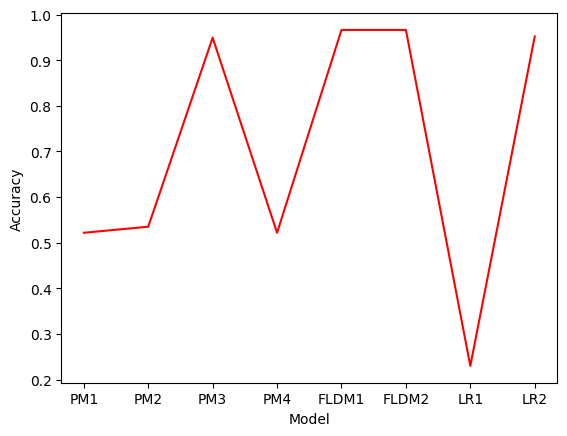

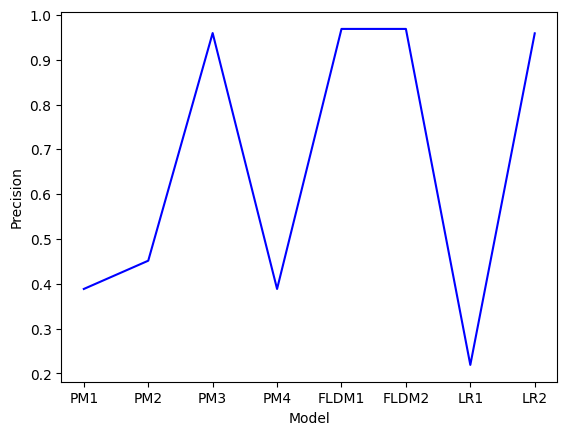

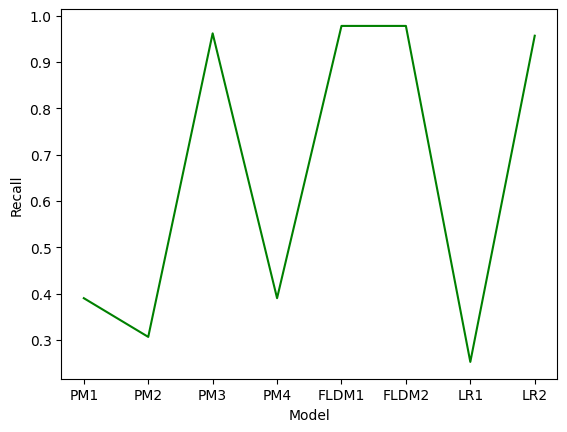

In [257]:
all_accuracy = [pm1_accuracy,pm3_accuracy,pm4_accuracy,fldm1_accuracy,fldm2_accuracy,lr1_accuracy,lr2_accuracy]
index = ["PM1","PM3","PM4","FLDM1","FLDM2","LR1","LR2"]
all_precision = [pm1_precision,pm3_precision,pm4_precision,fldm1_precision,fldm2_precision,lr1_precision,lr2_precision]
all_recall = [pm1_recall,pm3_recall,pm4_recall,fldm1_recall,fldm2_recall,lr1_recall,lr2_recall]
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.plot(index,all_accuracy,color="red")
plt.show()
plt.xlabel("Model")
plt.ylabel("Precision")
plt.plot(index,all_precision,color="blue")
plt.show()
plt.xlabel("Model")
plt.ylabel("Recall")
plt.plot(index,all_recall,color="green")
plt.show()